# A Deep Dive Into The _Tomb Raider_ Fanbase

## Introduction

This analysis is a "remake" of a project I made for fun and shared on my blog and my YouTube channel. It focusses on [Lara Croft](https://en.wikipedia.com/wiki/Lara_Croft), the fictional British archaeologist-adventurer starring as the main character of the [_Tomb Raider_](https://en.wikipedia.com/wiki/Tomb_Raider) videogame franchise. (If you prefer to read the codefree version of this project, you can find it [here](https://github.com/NicolaBagala/portfolio/blob/master/tomb_raider_survey/codefree/tr_survey_codefree.ipynb).)

Lara Croft has notoriously been a controversial character ever since her debut in 1996. While her fans regard her as an empowered heroine in the male-dominated videogame landscape, detractors see her as just another oversexualised female character created merely to please male players, and whose intentionally exaggerated sex appeal was exploited as a promotional and marketing gimmick from the very start.

The above is especially true of the very first [_Tomb Raider_ series](https://en.wikipedia.org/wiki/Tomb_Raider#History) (known as the Classic series) and the LAU trilogy, the franchise's first reboot. (LAU stands for _Legend_, _Anniversary_, and _Underworld_, the three installments in the series.) Differences between these two series are relatively minimal in every respect, but the same can't be said of the _Survivor_ trilogy. This was a hard reboot that dramatically changed the gameplay, the backstory, and Lara's character inside out; she was given a more average-looking body and face, as well as a rather different personality, all of which should supposedly have made her a more relatable character for modern audiences and especially female players. However, the stark constrast between _Survivor_ games and preceeding ones has polarised the fandom somewhat: while some players seem to enjoy all _Tomb Raider_ series, many others appear to prefer strongly either Classic and/or LAU games or _Survivor_ games, and the same can be said of the different versions of Lara starring in each series.

After spending some time interacting with the _Tomb Raider_ fanbase and reading articles about the franchise history, I was left with questions to answer and doubts to resolve:

1. **Is it true that Lara's exaggerated sex appeal in Classic and LAU games made both the games and the character unlikeable to female players?** Do they prefer Survivor Lara and/or _Survivor_ games instead?
2. Classic and LAU Lara's sex appeal was supposedly intended to attract straight male players. **Do straight males actually prefer Classic/LAU Lara over Survivor Lara?**
3. **Does the fandom agree that Classic/LAU Lara was oversexualised? In what ways?** What percentage of the fandom agrees? What factors, if any, influenced their opinion?

To answer these questions, I prepared a [survey](https://docs.google.com/forms/d/e/1FAIpQLSfo33HsdO5OEmI620z8POBSucdDoZphy8X_JqxjGxZoS6I7eg/viewform) in Google Forms and shared it on _Tomb Raider_-related subreddits, Facebook groups, Twitter accounts, Discord servers, and forums, in the summer of 2021; only respondents who played at least one _Tomb Raider_ game were allowed to complete the survey. The scope of my original project was actually larger than just answering the three questions above, but here I'm going to deal only with these questions plus a few extra ones to better understand the _Tomb Raider_ fanbase. Due to limited sample size, this will be mostly an exploratory analysis of the survey results, but I will also make use of statistical inference to try to generalise some conclusions to the fanbase as a whole.

## Setting up

This section contains general-purpose code, such as imports and matplotlib wrappers I wrote to simplify my work. If you're only interested in the analysis itself, you can skip this section.

### Basics
Imports and Jupyter magics.

In [113]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# Change matplotlib's image format to SVG, to avoid a text linespacing issue with asides.
%config InlineBackend.figure_formats = ["svg"] 

### Matplotlib wrappers and utilities

#### Chart style settings
Style-related options that I reuse often in the charts.

In [114]:
# Spine styles determines which spines are visible.
spine_style = {"lb": ["left", "bottom"],
               "l": ["left"],
               "b": ["bottom"],
               "lt": ["left", "top"],
               "rb": ["right", "bottom"]}

# Chart colors
sex_color = {"male": "cornflowerblue", 
             "female": "crimson", 
             "intersex": "slateblue", 
             "other/doesn't say":"limegreen"}

orient_color = {"straight": "dodgerblue", 
                "gay/lesbian": "indianred", 
                "bisexual": "chocolate", 
                "asexual": "lightgrey",
                "other/doesn't say": "limegreen",
                "non-straight": "orange"}

tr_color = {"classic":"royalblue", 
            "lau": "orangered", 
            "survivor": "teal",            
            "none": "grey"}

yesno_color = {"yes": "limegreen", 
               "no": "lightcoral", 
               "unsure/don't know": "dodgerblue"}

posneg_color = {"positive": "limegreen", 
               "negative": "lightcoral", 
               "neutral": "dodgerblue"}

enj_color = {"didn't play": "tab:gray",
              "not at all": "tab:red",
              "a little": "tab:orange",
              "somewhat": "tab:olive",
              "quite a bit": "tab:blue",
              "a lot": "tab:green"}

# Suptitle properties for Figures that have it.
from matplotlib.font_manager import FontProperties
suptitle_fontprops =  FontProperties(size = 15, weight = "bold")

# Used to highlight physical features in the OSX feature charts.
physical_color = "forestgreen"

#### Axes setup
Utilities to quickly set up axes and chart legends with a standard format.

The function below is used for standard 2D charts with two axes.

In [115]:
def cartesian(ax, xlabel = None, ylabel = None, spines = "lb", grid = (True, True), xlim = None, ylim = None, title = None):
    """Sets up `ax` as a cartesian axis with the given properties.
    `ax` is a matplotlib axes.
    `xlabel` and `ylabel` are the axes labels.
    `spines` determines which spines of the chart are visible.
    `grid` is a boolean tuple determining which axes of the grid are visible.
    `xlim` and `ylim` are tuples determining the limits of the respective axis.
    `title` is the title of the chart."""
    
    # zorder = 0 keeps the grid behind plotted values.
    ax.grid(True, alpha = 0.2, dashes = (5, 5), zorder = 0, color = "k") 
    ax.xaxis.grid(grid[0])
    ax.yaxis.grid(grid[1])    
    
    spines_to_show = spine_style[spines]
    spines_to_hide = [spine for spine in ["top", "bottom", "left", "right"] if spine not in spines_to_show]    
    ax.spines[spines_to_show].set_visible(True)
    ax.spines[spines_to_hide].set_visible(False)
           
    ax.set_facecolor("whitesmoke")
    
    if title: ax.set_title(title, fontweight = "bold", fontsize = "medium")
    
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    
    if xlim: ax.set_xlim(xlim)
    if ylim: ax.set_ylim(ylim)
    
    # This ensures that this axes is always above aside axes, which have zorder = 1.
    ax.set_zorder(2) 

The function below sets up a polar-coordinate axes, used in a handful of charts at the end of the project.

In [116]:
def polar(ax, angles):
    """Turns `ax` into a polar axis. There are only few, very specific instances where polar charts are used in this project, 
    so most of their appearance is hard-coded in this function.
    `ax` is a matplotlib axes.
    `angles` is a list of angles at which each line of the polar grid (and each of the feature labels) is located."""
    
    feature_labels = ["FACE", "BREASTS", "WAIST", "HIPS", "BEHAVIOUR", "CLOTHES", "ARTWORK", "ADS", "OTHER" ]   
    lines, labels = ax.set_thetagrids(angles, labels = feature_labels)
    
    # All radar charts in the projects display percentages from 0 to 100.
    ax.set_ylim(0, 100)
    # ytick labels are hidden to improve legibility.
    ax.set_yticklabels([]) 
    
    # Change the alignment of labels "BREASTS", "WAIST" and "ARTWORK" to prevent them from overlapping with the axes border.
    labels[1].set_horizontalalignment("left")
    labels[2].set_horizontalalignment("left")
    labels[6].set_horizontalalignment("right")    
    
    # Coordinates of the boundaries physical features area. (Degrees, 0.359) 
    boundary = [90, 80, 70, 60, 50, 40, 30, 20, 10, 350, 340, 330]
    # Highlight the physical features area.
    ax.fill_between(np.radians(boundary), 0, 100, color = physical_color, alpha = 0.1);
    
    # This ensures that this axes is always above aside axes, which have zorder = 1.
    ax.set_zorder(2)

The function below turns a Matplotlib `axes` into an 'aside'—basically, a fully blank `axes` used to easily place supplementary observations next to charts.

In [117]:
def aside(ax, title, text):    
    """Turns `ax` into an aside with information about the chart next to it.
    `ax` is a matplotlib axes.
    `title` is the aside's title.
    `text` is the chart's accompanying text."""
    
    # Asides have no borders whatsoever and are the same colour as the figure.
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
    ax.set_facecolor("whitesmoke")
        
    title_dict = {"fontsize": 12, "fontweight": "bold"}    
    aside_title = ax.set_title(title, fontdict = title_dict, y = 0.8, loc = "left")
    # The text coordinates don't matter, we'll have to change them below anyway.
    aside_text = ax.text(0, 0, text, fontsize = 12) 
    
    # This keeps the aside below other charts, which have zorder = 2.
    ax.set_zorder(1) 
    
    # The remaining code calculats a new position for aside_text and moves it there, to avoid collision with aside_title.
    fig = ax.get_figure()
    renderer = fig.canvas.get_renderer()
    
    # Bounding boxes
    bb_title = aside_title.get_window_extent(renderer = renderer)
    bb_text = aside_text.get_window_extent(renderer = renderer)
    
    # AB is the left-hand side of bb_text (aside_text's bounding box), A being the bottom point and B the top point.
    A = (bb_text.xmin, bb_text.ymin)
    B = (bb_text.xmin, bb_text.ymax)       
    # Transform A and B into figure units. 
    A_fu = ax.transAxes.inverted().transform(A)
    B_fu = ax.transAxes.inverted().transform(B)   
    
    # C is the point at the bottom-left corner of bb_title (aside_title's bounding box).
    C = (bb_title.xmin, bb_title.ymin)
    # Transform C into figure units.
    C_fu = ax.transAxes.inverted().transform(C)   
    
    # Calculate the y-coordinate of aside_text needed so that it won't collide with aside_title.
    aside_text_height = B_fu[1] - A_fu[1]
    aside_text_y = C_fu[1] - aside_text_height + 0.02    
    aside_text.set_y(aside_text_y)

Below is a utility function used to ensure a specific element of a chart's legend (the "optout") is always placed at the bottom.

In [118]:
def move_optout_to_last(labels, optout):  
    """Reorders the indices of a legend's labels so that the opt-out option (or any option that must be the last) 
    is always the bottom one, without changing anything else. 
    `labels` is a list of labels to be reordered.
    `optout` is the label that needs to be displayed at the bottom of all others.    
    """
    
    labels_order = []
    optout_id = None
    
    for idx, label in enumerate(labels):
        if label == optout:
            optout_id = idx
            continue
        labels_order.append(idx)
    
    labels_order.append(optout_id)
    return labels_order  

The function below sets up a chart's legend.

In [119]:
def legend_setup(ax, loc = "best", optout = None):
    """Sets up and shows the legend of a chart, if necessary rearranged so that optout is at the bottom.
    `ax` is a matplotlib axes.
    `loc` can be a tuple of coordinates or 'best'. If tuple, the legend will be placed on those coordinates. 
    If 'best', matplotlib will determine the best location for the legend automatically."""    
    
    legend_handles, legend_labels = ax.get_legend_handles_labels()    
    
    if optout:
        legend_order = move_optout_to_last(legend_labels, optout)
        legend_handles = [legend_handles[idx] for idx in legend_order]
        legend_labels =  [legend_labels[idx] for idx in legend_order]
        
    ax.legend(legend_handles, legend_labels, loc = loc)

The function below is used to break chart labels into two parts, to prevent overlapping with other labels.

In [120]:
def break_ticklabels(tick_labels, overlaps_with_next):
    """Breaks tick labels into parts if necessary, so that they can be displayed without overlapping.
    `tick_labels` is a list of `n` tick labels. 
    `overlaps_with_next` is a list of `n - 1` booleans. If the i-th value of `overlaps_with_next` is `True`, 
    it means the i-th tick label overlaps with the i + 1-th tick label.""" 
    
    import pyphen
    
    new_labels = []      
    last_label_idx = len(overlaps_with_next)
    
    for index, tick_label in enumerate(tick_labels):         
        tick_label_length = len(tick_label)
        
        # Break the label up if it overlaps with the next one or if it's just too long, i.e. longer than 10 characters. 
        # (After the last label, there's nothing it could overlap with, so don't check that.)        
        if (index < last_label_idx and overlaps_with_next[index]) or tick_label_length >= 11:
            
            # If the label contains spaces, break it at the first space.
            first_space_idx = tick_label.find(" ")
            if first_space_idx > -1:
                new_tick_label = tick_label[0 : first_space_idx] + "\n" + tick_label[first_space_idx + 1 : ]                
            else:
                # If there are no spaces, use Pyphen to hyphenate the label.                
                dic = pyphen.Pyphen(lang = "en_UK")
                # Set the first half of the hyphenated label to be no longer than 6 characters.
                hyphenated_label = dic.wrap(tick_label, 6)
                
                # If hyphenation fails, leave the label as it is.
                if hyphenated_label is None:
                    new_tick_label = tick_label
                else: # If hyphenation didn't fail, put together the two halves on separate lines.
                    new_tick_label = hyphenated_label[0] + "\n" + hyphenated_label[1]                    
            new_labels.append(new_tick_label)
            
        else:
            # If the label doesn't qualify for breaking up, add it as it is to new_labels.
            new_labels.append(tick_label)            
            
    return new_labels

The function below detects whether labels on a chart overlap with neighbouring labels.

In [121]:
def overlapping_texts(ax, texts):    
    """Returns a list of length `len(texts) - 1` populated with `True` or `False`,
    depending on whether the next text in the list
    overlaps with the previous one along the x (horizontal) axis.
    
    `ax` is a matplotlib axes.
    `texts` is a list of texts on `ax` that need to be checked for overlapping.
    """    
    
    fig = ax.get_figure()
    renderer = fig.canvas.get_renderer()
    
    overlap_list = []
    
    # After the last text, there's no text it could overlap with, so we need to check all but the last one.
    num_texts_to_check = len(texts) - 1
    
    for index in range(num_texts_to_check):
        text1 = texts[index]
        text2 = texts[index + 1]
        
        # Get the bounding box of the texts.    
        bb1 = text1.get_window_extent(renderer = renderer)
        bb2 = text2.get_window_extent(renderer = renderer)
        
        # If the two boxes are closer than `limit`, consider the texts as overlapping.
        limit = 7
        end_point1 = bb1.xmax
        start_point2 = bb2.xmin           
        overlap_list.append(start_point2 - end_point1 < limit)
    
    return overlap_list

#### Plotting functions
Matplotlib wrappers that plot charts according to parameters I predefined.

##### Pie chart

In [122]:
def pie_chart(ax, data, colors, explode = None):
    """Turns `ax` into a pie chart with the given data and predefined settings.
    `ax` is a matplotlib axes.    
    `data` is a series whose values are to be plotted.
    `colors` is either a list of colors or a dict from which colors can be desumed using data labels as keys.    
    `explode` is an array of floats indicating how far from the centre each wedge should be. If `None`, no wedge
    will be exploded. """    
    
    # Default pie chart properties.
    wedgeprops = {"linewidth": 0.5, "edgecolor": "black"}
    textprops = {"fontsize": 13, "color": "white", "fontweight": "bold"}
    
    # Labels of the wedges (the slices). wedge_texts objects (below) will have these values.
    wedge_labels = data.index
    
    if type(colors) == dict:
        colors = [colors[key.lower()] for key in wedge_labels]
    
    # Draw pie.
    wedges, wedge_texts, wedge_percents = ax.pie(data, 
           labels = wedge_labels,
           labeldistance = None, # This prevents wedge_texts from being shown on the wedges. (They should be in the legend only.)
           explode = explode,           
           colors = colors,           
           autopct = "%.1f%%", # Format the percentages shown by each wedge.
           wedgeprops = wedgeprops,
           textprops = textprops)
    
    # If the size of a wedge is less than a given threshold, push the autopct text out of the wedge.
    # (Adapted from 
    # https://stackoverflow.com/questions/60228476/conditionally-moving-the-position-of-a-single-data-label-in-a-pie-chart)    
    for i, (wdg, wedge_pct) in enumerate(zip(wedges, wedge_percents)):
        if (wdg.theta2 - wdg.theta1) <= 20:
            # Angle at which the wdg_pct is normally located.
            angle = (wdg.theta2 + wdg.theta1) / 2.
            # New distance to the pie centre
            x = wdg.r * 1.2 * np.cos(angle * np.pi / 180)
            y = wdg.r * 1.2 * np.sin(angle * np.pi / 180)
            
            # Account for exploded wedges.
            x += explode[i]            
            
            # Move wedge_pct to new position and make it black to set it apart.
            wedge_pct.set_position((x, y))
            wedge_pct.set_color("black")
    
    ax.set_zorder(2) # This places the pie chart above asides, which have zorder = 1.

##### Vertical bar chart

In [123]:
def bar_chart(ax, data, colors, align = "center", x_shift = 0, width = 0.8,  label = None, datalabels = None, alpha = 1, edgecolor = None):
    """Turns `ax` into a bar chart with the given properties.
    `ax` is a matplotlib axes.    
    `data` is a series whose values are to be plotted.
    `colors` is either a list of colors or a dict from which colors can be desumed using the index of `data` as keys.   
    `align` determines the alignment of the bars with respect to their ticks.
    `x_shift` determines how much and in which direction the bars should be shifted with respect to their ticks.
    `width` determines the witdh of bars.     
    `label` is the label used in the legend to indicate the bars.
    `datalabel` can be `None`, 'data',  or a series. If None, no data labels are displayed next to the bars. 
    If 'data', uses the `data` series passed as second argument. If series, uses series values as data labels.
    `alpha` is the alpha value (transparency) of the bars. Default is 1 (solid).
    `edgecolor` is the edge color of the bars."""
    
    if type(colors) == dict:        
            colors = [colors[key.lower()] for key in data.index]     
        
    ax.bar(x = [i + x_shift for i in range(len(data))],
           height = data.values, 
           tick_label = data.index,           
           color = colors,
           align = align,
           width = width,
           label = label,
           alpha = alpha,
           edgecolor = edgecolor,           
           zorder = 2); # zorder = 2 ensures the bars are above the grids of the chart.
    
    # Make sure xtick labels don't overlap.
    overlap_list = overlapping_texts(ax, ax.get_xticklabels())
    xtick_labels = break_ticklabels(data.index, overlap_list)     
    ax.set_xticks(ax.get_xticks(), xtick_labels)
            
    # Show data labels if required.
    if datalabels is not None:
        labels = data # Assume that datalabels are the same as the data themselves, unless `datalabels` is a series.
        if isinstance(datalabels, pd.Series):
            labels = datalabels 
        # Display datalabels just above each bar.
        for idx, value in enumerate(data):
            ax.text(idx, value + 2, labels[idx], ha = "center")    

##### Horizontal bar chart

In [124]:
def barh_chart(ax, data, colors, align = "center", height = 0.8, label = None, datalabels = None):
    """Turns `ax` into a horizontal bar chart with the given properties.
    `ax` is a matplotlib axes.    
    `data` is a series whose values are to be plotted.
    `colors` is either a list of colors or a `dict` from which colors can be desumed using the index of `data` as keys.         
    `align` determines the alignment of the bars with respect to their ticks.
    `height` determines the witdh of the bars.    
    `label` is the label used in the legend to indicate the bars.        
    `datalabel` can be `None`, 'data', or a series. If `None`, no data labels are displayed next to the bars. 
    If 'data', uses the `data` series passed as second argument. If series, uses series values as data labels."""
    
    if type(colors) == dict:        
            colors = [colors[key.lower()] for key in data.index]            

    ax.barh(y = [i for i in range(len(data))],
           width = data.values, 
           tick_label = data.index,           
           color = colors,
           align = align,
           height = height,
           label = label,
           zorder = 2) # zorder = 2 makes sure that the bars are drawn above the chart grid.

    # Shows data labels if required.
    if datalabels is not None:
        labels = data # Assume that datalabels are the same as the data themselves, unless datalabels is a series.
        if isinstance(datalabels, pd.Series):
            labels = datalabels
        # Place data labels just right of the bars, vertically centered, and give them the same colour as their bars.
        for idx, value in enumerate(data):
            color = colors[idx]
            ax.text(value + 2, idx, labels[idx], va = "center", color = color)     

##### Line chart

In [125]:
def line_chart(ax, data, color, label = None, marker = None, datalabels = None):
    """Turns `ax` into a line chart with the given properties.        
    `ax` is a matplotlib axes.    
    `data` is a series whose values are to be plotted.
    `color` is the line color.         
    `label` is the label used in the legend to indicate the line.
    `marker` is the type of marker to display for the data points.
    `datalabels` can be `None`, 'data', or a series. If `None`, no data labels are displayed next to the line. 
    If 'data', uses the `data` series passed as second argument. If series, uses series values as data labels.
    """  
    
    data_x_locations = [i for i in range(len(data))]
    
    ax.plot(data_x_locations, data, linewidth = 2, color = color, marker = marker, label = label)
        
    # Make sure xtick labels don't overlap.
    overlap_list = overlapping_texts(ax, ax.get_xticklabels())
    xtick_labels = break_ticklabels(data.index, overlap_list)             
    ax.set_xticks(data_x_locations, xtick_labels)
    
    # Show data labels if required.
    if datalabels is not None:
        labels = data # Assume that datalabels are the same as the data themselves, unless datalabels is a series.
        if isinstance(datalabels, pd.Series):
            labels = datalabels
        for idx, value in enumerate(data):            
            ax.text(idx, value + 4, labels[idx], ha = "center", weight = "bold")     

##### Confidence interval chart

In [126]:
def confidence_intervals(ax, intervals, colors):
    """Plots confidence intervals for given variables.
    `ax` is a Matplotlib axes.
    `intervals` is a series whose index contains the variables whose CI must be plotted; the series values contains 3-uples with the lower bound, centre,
    and upper bound of the confidence interval.
    `colors` is a `dict` from which colors can be desumed using the index of `intervals` as keys.
    """
    
    for y, interval_data in enumerate(intervals.items()):
        variable = interval_data[0]
        points = interval_data[1]
        lower_bound, centre, upper_bound = points[0], points[1], points[2]
        color = colors[variable.lower()]
        # Plot the interval.
        ax.plot([lower_bound, centre, upper_bound], [y, y, y], color = color)
        # Highlight the centre and the bounds separately.
        ax.plot(centre, y, color = color, marker = "o" )
        ax.plot(lower_bound, y, color = color, marker = "|", markersize = 10)
        ax.plot(upper_bound, y, color = color, marker = "|", markersize = 10)    
    ax.set_yticks(range(len(intervals)), list(intervals.index))

### Statistical functions

In [127]:
def prop_std_err(props, samples):
    """Calculates the standard errors for a series of sample proportions within a given sample.
    `props` is a (list of) series representing the proportions of interest in `samples`.
    `samples` is a (list of) series or dataframe(s) representing the sample(s). It's used only to know the sample size.
    
    Returns: Pandas series
    """
    
    radicand = 0
    
    # If `prop` (and thus `sample`) is not a list, we're dealing with the std err of a single proportion.
    if type(props) != list:
        radicand = props * (1 - props) / len(samples)
        
    else: # If it is a list, we're dealing with the std erro of a difference of proportions.
        for i in range(len(props)):
            prop = props[i]
            sample = samples[i]
            radicand += prop * (1 - prop) / len(sample)
    
    se = np.sqrt(radicand)
    return se

def build_confidence_intervals(point_estimates, std_errs):
    """Calculates the lowe and upper bounds of the confidence intervals of the given point estimates with the
    provided standard errors, on the assumption that the underlying distribution is approximately normal. 
    All confidence levels are at 95% by default.
    
    `point_estimates` is a Pandas series containing the point estimates. Its index is expected to contain 
     the names of the variable whose point estimate is being given.
     
     `std_errs` is a Pandas series containing the standard errors for each point estimate. Its index is expected
     to be the same as that of `point_estimates`.
    
    Returns: Pandas series indexed like `point_estimate` containing a 3-uple
    of the form (lower_bound, center, upper_bound).
    """
    from scipy.stats import norm
    
    tuples = pd.Series(dtype = object)
    
    for variable in point_estimates.index:
        center = point_estimates[variable]
        se = std_errs[variable]
        interval = norm.interval(0.95, loc = center, scale = se)
        tuples[variable] = (interval[0], center, interval[1])
        
    return tuples

### Other functions

In [128]:
def tr_format(string):
    """Formats `string` in title case, unless lowercase `string` is 'lau', in which case it turns it
    into allcaps. Used to format the names of Tomb Raider series or versions of Lara appropriately:
    - Classic (titlecase)
    - LAU (allcaps)
    - Survivor (titlecase)    
    `string` is the string to be formatted.
    """    
    
    if string.lower() == "lau": return "LAU"
    return string.title()

def print_header(text):
    """Prints a header using `text` as text.
    `text` is a string.
    """
    print(text, len(text) * "-", sep = "\n")

## The dataset

A total of 208 people completed my survey; this is only a very small fraction of the _Tomb Raider_ fanbase (at the time of writing, [/r/TombRaider](https://reddit.com/r/TombRaider) alone counts nearly 50,000 subscribers), and many of its subsamples that we will see are simply far too small to do any reliable statistical analysis on them. In few cases when the subsample size was at least within the assumptions of the central limit theorem, I constructed confidence intervals for the observed point estimates, but they're all to be taken with several grains of salt because of the fairly large margin of error. Whether the sample can be considered truly random is arguable, but in the circumstancs we will assume it is. (You should always strive to get the best data, but sometimes all you can do is make the most of whatever little data you have.)

Each row in the dataset represents a unique survey taker; columns contain the answers to the questions that respondents were asked. The dataset we'll be working with is smaller than the original; as we're interested in only some of the questions, it has the same number of rows but a smaller number of columns. In this section, we'll get quickly familiar with it.

In [129]:
survey = pd.read_csv("tr_survey.csv")
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LIKE_CLASSIC       208 non-null    object
 1   LIKE_LAU           208 non-null    object
 2   LIKE_SURVIVOR      208 non-null    object
 3   FAVOURITE_LARA     208 non-null    object
 4   CLL_OVERSEX        208 non-null    object
 5   CLL_OSX_FACE       208 non-null    bool  
 6   CLL_OSX_BREASTS    208 non-null    bool  
 7   CLL_OSX_WAIST      208 non-null    bool  
 8   CLL_OSX_HIPS       208 non-null    bool  
 9   CLL_OSX_BEHAVIOUR  208 non-null    bool  
 10  CLL_OSX_CLOTHES    208 non-null    bool  
 11  CLL_OSX_ARTWORK    208 non-null    bool  
 12  CLL_OSX_ADS        208 non-null    bool  
 13  CLL_OSX_OTHER      208 non-null    bool  
 14  CLASSIC_ATTR       208 non-null    bool  
 15  LAU_ATTR           208 non-null    bool  
 16  SURVIVOR_ATTR      208 non-null    bool  
 1

- `LIKE_CLASSIC`, `LIKE_LAU`, and `LIKE_SURVIVOR` quantify how much each respondent enjoyed the specific _Tomb Raider_ series;
- `FAVOURITE_LARA` specifies the respondent's favourite version of Lara, if any; it can be `Classic`, `LAU`, `Survivor` or `None`;
- `CLL_OVERSEX` can be `Yes`, `No`, or `Unsure/Don't know`, depending on whether the respondent thought Classic and/or LAU Lara were oversexualised (`CLL` stands for "**C**lassic/**L**AU **L**ara", an abbreviation we'll use often);
- Columns from `CLL_OSX_FACE` to `CLL_OSX_OTHER` specify which features of CLL were oversexualised in the respondents' opinion;
- `CLASSIC_ATTR`, `LAU_ATTR`, and `SURVIVOR_ATTR` indicate which versions of Lara respondents found attractive (this information is used to detect possible bias in some answers, among other things);
- Finally, `SEX`, `ORIENTATION`, and `AGE_GROUP` describe the respondents in terms of their biological sex, sexual orientation, and age.

Data wrangling was done in Google Sheets, so there is no wrangling left to do here. (If you're interested in seeing how I did that, you can do so [here](https://docs.google.com/spreadsheets/d/1sVNQTFukXR4EWABuUwdyz_kBW-xvAq20ixFzJu-X_Wk/edit?usp=sharing).) The survey had no write-ins and no answer could be left blank, which means there are no nulls; however, for the sake of consistency, we're going to add some now.

One of the questions that survey takers were asked was if they thought CLL was oversexualised. If they answered `Yes`, they were asked to say what features were oversexualised, and their answers were recorded as booleans in columns `5` through `13`. If they answered anything other than `Yes`, they weren't asked anything about features, so, for these respondents, the feature columns shouldn't be `True` or `False`, but rather `Null`. This didn't really matter in Google Sheets, nor does it here because the feature columns are only taken into account when `CLL_OVERSEX == "Yes"`, but I find that marking the nulls appropriately makes things more clear. Only 80 people answered `Yes`, so we should have only 80 non-null values in columns `5-13`, either 1's (`True`) or 0's (`False`).

In [130]:
feature_columns = survey.columns[5:14]

# Turn feature columns into floats.
for column in feature_columns:
    survey[column] = survey[column].astype(float)
    
# Set feature columns to np.nan wherever `CLL_OVERSEX` is not "Yes"
survey.loc[survey["CLL_OVERSEX"] != "Yes", feature_columns] = np.nan
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LIKE_CLASSIC       208 non-null    object 
 1   LIKE_LAU           208 non-null    object 
 2   LIKE_SURVIVOR      208 non-null    object 
 3   FAVOURITE_LARA     208 non-null    object 
 4   CLL_OVERSEX        208 non-null    object 
 5   CLL_OSX_FACE       80 non-null     float64
 6   CLL_OSX_BREASTS    80 non-null     float64
 7   CLL_OSX_WAIST      80 non-null     float64
 8   CLL_OSX_HIPS       80 non-null     float64
 9   CLL_OSX_BEHAVIOUR  80 non-null     float64
 10  CLL_OSX_CLOTHES    80 non-null     float64
 11  CLL_OSX_ARTWORK    80 non-null     float64
 12  CLL_OSX_ADS        80 non-null     float64
 13  CLL_OSX_OTHER      80 non-null     float64
 14  CLASSIC_ATTR       208 non-null    bool   
 15  LAU_ATTR           208 non-null    bool   
 16  SURVIVOR_ATTR      208 non

## Analysis

We'll start with an overview of the fandom's demographics, to get a better sense of the sample we're dealing with. Then, we'll move on to finding out how much the fans enjoyed each different series and what version of Lara they like the most. This will not just answer some of our questions per se, but also help us detect bias later on, when we'll try to figure out whether CLL was or wasn't oversexualised according to the respondents. Finally, we'll see how, if at all, they thought CLL was oversexualised.

### The _Tomb Raider_ fandom seems predominantly male

The largest demographic group in the sample is that of straight males between the ages of 25 and 34 (16.3%). The second (13.5%) and third (10.1%) largest groups are still male, differing only in sexual orientation and/or age group; straight females between the ages of 25 and 34 come in fourth place, standing at 9.1% of the sample. 

In [131]:
first_five_SOA = (100 * survey[["SEX", "ORIENTATION", "AGE_GROUP"]].value_counts(normalize = True)).round(1).head().apply(lambda x: "{}%".format(x))
print_header("First five largest groups, by sex, orientation, and age:")
first_five_SOA

First five largest groups, by sex, orientation, and age:
--------------------------------------------------------


SEX     ORIENTATION  AGE_GROUP
Male    Straight     25-34        16.3%
        Gay/Lesbian  25-34        13.5%
        Straight     18-24        10.1%
Female  Straight     25-34         9.1%
Male    Gay/Lesbian  18-24         6.7%
dtype: object

In general, **the sample was predominantly male, with females constituting only about 30% of the respondents,** as shown below.

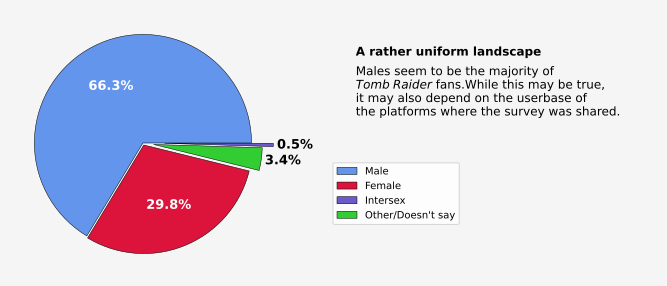

In [132]:
sex_distribution = survey["SEX"].value_counts()
fig_sex, (ax_sex, ax_sex_txt) = plt.subplots(1, 2, figsize = (12, 5), facecolor = "whitesmoke")
pie_chart(ax_sex, sex_distribution, sex_color, explode = [0, 0.02, 0.1, 0.2])
legend_setup(ax_sex, loc = (1.2, 0.2), optout = "Other/Doesn't say")
aside(ax_sex_txt, "A rather uniform landscape", ("Males seem to be the majority of\n$\it{Tomb \; Raider}$ fans."
                                                 "While this may be true,\nit may also depend on the userbase of\n"
                                                 "the platforms where the survey was shared."))

_`Figure 1. Sex distribution of the sample.`_

[Historically](https://en.wikipedia.org/wiki/Women_and_video_games), most gamers were male, especially during the earlier years of the _Tomb Raider_ franchise. This might be a reason explaining the lower percentage of female _Tomb Raider_ fans, despite the fact that the overall percentage of female gamers is presently inching towards 50%. However, this statistic is most likely affected by the userbase of the platforms where I shared my survey; for example, Reddit is [mostly male](https://www.statista.com/statistics/1255182/distribution-of-users-on-reddit-worldwide-gender/), and so is [Twitter](https://www.statista.com/statistics/828092/distribution-of-users-on-twitter-worldwide-gender/). The same reasoning applies to other demographic variables: any over- or underrepresented age cohorts or sexual orientations on the social media outlets I used are likely to have skewed the results.

Interestingly, while **heterosexual players constitute the majority of the sample,** they're not the _absolute_ majority.

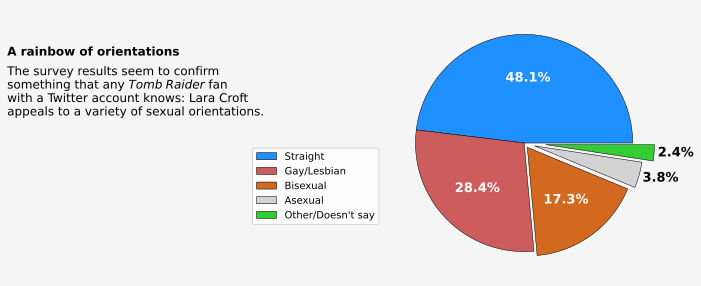

In [133]:
orientation_distribution = survey["ORIENTATION"].value_counts()
fig_orientation, (ax_orientation_txt, ax_orientation) = plt.subplots(1, 2, figsize = (12, 5), facecolor = "whitesmoke")
pie_chart(ax_orientation, orientation_distribution, orient_color, explode = [0, 0, 0.05, 0.1, 0.2])
legend_setup(ax_orientation, loc = (-0.5, 0.2), optout = "Other/Doesn't say")
aside(ax_orientation_txt, "A rainbow of orientations", ("The survey results seem to confirm\n"
                                                        "something that any $\it{Tomb \; Raider}$ fan\n"
                                                        "with a Twitter account knows: Lara Croft\n"
                                                        "appeals to a variety of sexual orientations."))

_`Figure 2. Sexual orientation distribution of the sample.`_

**The majority of the respondents were between the ages of 25 and 34,** meaning that they were at most about 10 years old when the first _Tomb Raider_ was released and they may well have been fans ever since the franchise's early days. Keeping in mind the aforementioned caveats on the representativity of this sample, it's however interesting that only about 11% of the respondents were in the 35-44 age group; people of this cohort were teenagers when Lara Croft first appeared on the scene, and I would have expected them to constitute the majority of the fanbase. (Keep in mind that some people in the majority cohort weren't even born when the first game came out!) However, it's possible that all these younger fans were drawn to the franchise by later installments—some of which were published as late as the mid-2010's.

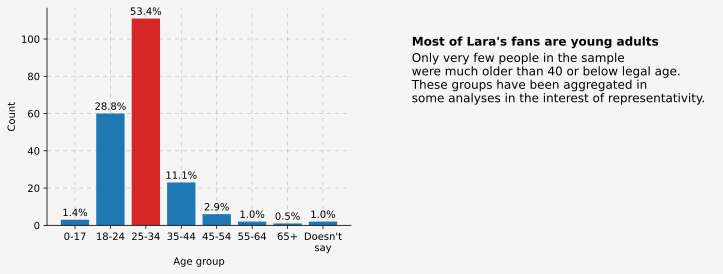

In [134]:
age_distribution = survey["AGE_GROUP"].value_counts().sort_index()
age_distr_pct = (100 * age_distribution / age_distribution.sum()).round(1).astype(str).apply(lambda x: "{}%".format(x))
fig_age, (ax_age, ax_age_txt) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")
cartesian(ax_age, xlabel = "Age group", ylabel = "Count")

# Highlight the tallest bar
age_colors = ["tab:blue" for i in range(len(age_distribution.index))]
age_colors[2] = "tab:red" 

bar_chart(ax_age, age_distribution, age_colors, datalabels = age_distr_pct)
aside(ax_age_txt, "Most of Lara's fans are young adults", ("Only very few people in the sample\n"
                                                           "were much older than 40 or below legal age.\n"
                                                           "These groups have been aggregated in\n"
                                                           "some analyses in the interest of representativity."))

_`Figure 3. Respondent count and percentage, by age cohort.`_

Respondents in the `0-17`, `45-54`, and subsequent age cohorts were very few—too few to draw any meaningful conclusions about their respective cohorts. For that reason, I decided to aggregate them as follows:

- The `0-17` cohort was aggregated with the `18-24` cohort to form the `0-24` cohort;
- Cohorts `45-54` to `65+` have been aggregated into the `45+` cohort
- The `Doesn't say` cohort has has been excluded from any analysis related to age.

In [135]:
def change_cohort(cohort):
    """Changes specific cohorts as follows:
    - 0-17 and 18-24 -> 0-24
    - 45-54, 55-64, 65+ -> 45+    
    Any other cohorts are returned unchanged.    
    `cohort` is a string like '0-17', '18-24', etc.
    """
    if cohort in ["0-17", "18-24"]: return "0-24"
    if cohort in ["45-54", "55-64", "65+"]: return "45+"
    return cohort    

# Modify the existing dataset. We won't need the original age cohorts anymore.
survey["AGE_GROUP"] = survey["AGE_GROUP"].map(lambda x: change_cohort(x))

new_cohorts_count = survey["AGE_GROUP"].value_counts()
new_cohorts_pct = round(100 * survey["AGE_GROUP"].value_counts(normalize = True), 1).apply(lambda x: "{}%".format(x))
new_cohorts = pd.DataFrame({"Percentage": new_cohorts_pct, "Count": new_cohorts_count})
print_header("Aggregated age cohorts:")
print(new_cohorts.sort_index())

Aggregated age cohorts:
-----------------------
            Percentage  Count
0-24             30.3%     63
25-34            53.4%    111
35-44            11.1%     23
45+               4.3%      9
Doesn't say       1.0%      2


### Classic _Tomb Raider_ games are still the fans' favourites overall

In this section, we'll see how much the respondents enjoyed each different _Tomb Raider_ series, and in particular whether female respondents liked some more than others and if they did so more or less than male respondents. We'll need to plot structurally similar charts multiple times, so it's worth writing a single, reusable function for it.

In [136]:
def series_enjoyment_bars(fig, ax_counts, ax_pcts, dataset, ylabel, suptitle, no_play_included):
    """Calculates absolute and percentage counts of the given data and populates two separate series enjoyment bar charts with them.
    
    `fig` is the figure containing the axes.
    `ax_counts` is a matplotlib axes that will display the absolute counts.
    `ax_pcts` is a matplotlib axes that will display the percentages.    
    `dataset` is the dataset to be used to perform the calculations.
    `ylabel` is the y-label of the leftmost axis.
    `suptitle` is the figure's title.
    `no_play_included` determines if the option `Didn't play` must be included (boolean)
    """
    
    index = ["A lot", "Quite a bit", "Somewhat", "A little", "Not at all"]
    if no_play_included: index = index + ["Didn't play"]
    
    # Determine the absolute and percentage count of opinions for each series.
    total_counts = pd.DataFrame(index = index)
    for series in ["CLASSIC", "LAU", "SURVIVOR"]:
        column = "LIKE_" + series
        if no_play_included:
            series_counts = dataset[column].value_counts()          
        else:
            series_counts = dataset.loc[dataset[column] != "Didn't play", column].value_counts()          
        total_counts[series] = series_counts

    # Any Nulls must be filled with zeroes.
    total_counts.fillna(0, inplace = True)
    
    # Percentages are calculated relative to each Tomb Raider series' total players (i.e., column totals).
    percents = (100* total_counts.div(total_counts.sum(axis = 0)))
    
    cartesian(ax_counts, xlabel = "", ylabel = ylabel, title = "Count")
    bar_chart(ax_counts, total_counts["SURVIVOR"], align = "edge", width = 0.25, x_shift = 0.375, colors = tr_color["survivor"])
    bar_chart(ax_counts, total_counts["CLASSIC"], align = "center", width = 0.25, colors = tr_color["classic"])
    bar_chart(ax_counts, total_counts["LAU"], align = "center", width = 0.25, x_shift = 0.25, colors = tr_color["lau"])

    cartesian(ax_pcts, xlabel = "", ylabel = "", title = "Percentage", ylim = (0, 100))
    bar_chart(ax_pcts, percents["SURVIVOR"], align = "edge", width = 0.25, x_shift = 0.375, colors = tr_color["survivor"], label = "Survivor")
    bar_chart(ax_pcts, percents["CLASSIC"], align = "center", width = 0.25, colors = tr_color["classic"], label = "Classic")
    bar_chart(ax_pcts, percents["LAU"], align = "center", width = 0.25, x_shift = 0.25, colors = tr_color["lau"], label = "LAU")

    legend_setup(ax_pcts, optout = "Survivor")
    fig.suptitle(suptitle, fontproperties = suptitle_fontprops)
    fig.tight_layout()

#### Enjoyment in general

Both to understand the fanbase's preferences and whether their opinion on Lara Croft's oversexualisation correlates with them in any way, I asked respondents to rate how much they enjoyed Classic, LAU, and _Survivor_ games, according to the following scale:

- `Didn't play` 
- `Not at all`
- `A little`
- `Somewhat`
- `Quite a bit`
- `A lot`

Below is a summary of the responses, both in absolute and percentage terms.

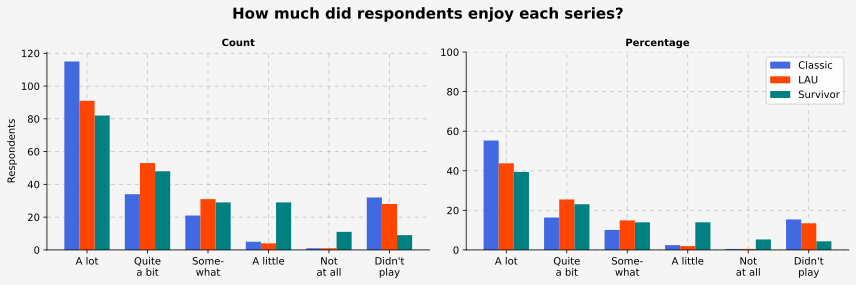

In [137]:
fig_series_enjoyment, (ax_series_enjoyment_counts, ax_series_enjoyment_pct) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")
series_enjoyment_bars(fig_series_enjoyment, ax_series_enjoyment_counts, ax_series_enjoyment_pct, survey, "Respondents", "How much did respondents enjoy each series?", True)

_`Figure 4. Respondent enjoyment of each Tomb Raider series, in absolute and percentage terms.`_

`Figure 4` leaves little doubt that, in the sample, the Classic _Tomb Raider_ series was enjoyed more than others. About 55% of Classic players liked the series `A lot`—an option that, for this series, was chosen by a majority in both absolute and percentage terms. While this series was liked `Quite a bit` and `Somewhat` less than the other two, this is abundantly compensated for by the many more players who liked it `A lot` and the near absence of respondents who liked it `A little` or `Not at all.` More respondents didn't play the Classic series than the other two, possibly because it's so much older and fairly problematic to run on newer systems.

LAU performed decently and systematically better than _Survivor_: it was liked `A lot`, `Quite a bit`, and `Somewhat` always at least a bit more than _Survivor_ was, and the respondents who said they liked it `A little` or `Not at all` were always quite a bit fewer than those who said the same of _Survivor_. Respondents who didn't play LAU were slightly fewer than those who didn't play the classics, but still more than 13% of the sample.

The _Survivor_ series was far more played in the sample, with only barely 4% of respondents saying they didn't play it, but it registers the highest amount of negative feedback, being liked `A little` or `Not at all` far more than the other two series put together, both in absolute and relative terms. _Survivor_ certainly doesn't lack positive feedback, but it was liked `A lot`, `Quite a bit`, and `Somewhat` always less than at least either of the other two series.

Unfortunately, not all options were chosen a sufficient number of times to be safely considered representative of the whole fandom; this is especially true of the negative options. For this reason, any extrapolation beyond the sample would be strained at best, but we can still dig a bit deeper into the preferences of the sample.

Intuitively, being liked `A lot` is better than being liked `Quite a bit`; so, for example, being liked `A lot` by 50 respondents should be better than being liked `Quite a bit` by the same number of respondents. One could even argue that being liked `A lot` by 50 people is better than than being liked `Quite a bit` by 60 people. I decided to model this reasoning by assigning arbitrary "enjoyment scores" to each of the options as follows:

- `Not at all`: -2
- `A little` -1
- `Somewhat`: 0
- `Quite a bit`: 1
- `A lot`: 2

I left out `Didn't play` because, obviously, it doesn't make sense to ask how much a respondent enjoyed a series they didn't play; I assumed `Somewhat` to be a "neutral" answer chosen by respondents who liked some features of a series but disliked others in similar proportions, so `0` seemed a natural choice for its value. I then summed all negative and positive scores separately for each series, and then added them together to obtain an overall score. Each of these three scores was then divided by the maximum possible score for the series, calculated as $2 \cdot n_s$, where $n_s$ is the number of respondents who played a certain series. The number of respondents that played each series (so, excluding any `Didn't play`) is given below.

In [138]:
series_players = pd.Series(dtype = "int64")
for series in ["CLASSIC", "LAU", "SURVIVOR"]:
    series_players[tr_format(series)] = len(survey.loc[survey["LIKE_" + series] != "Didn't play", "LIKE_" + series])
print_header("Respondents who have played each series:")
series_players

Respondents who have played each series:
----------------------------------------


Classic     176
LAU         180
Survivor    199
dtype: int64

So, for example, 176 players played at least one Classic game, so the maximum possible score for the Classic series is $2 \cdot 176 = 352$. Basically, the maximum possible score for a series is the score the series would have if every respondent who played it enjoyed it `A lot`.

The function below calculates the enjoyment scores as a fraction of the maximum possible score, with a theoretical minimum of -1 (each respondent who played the series didn't enjoy it at all) and a theoretical maximum of 1 (each respondent who played the series enjoyed it a lot). In essence, **the enjoyment scores illustrate how close each series got to scoring the maximum it could have scored in the sample.**

In [139]:
def calculate_enjoyment_scores(raw_scores):
    """Returns a series containing the positive, negative, and overall scores for a Tomb Raider series, filtering out
    respondents who didn't play it.    
    `raw_scores` is a series containing the individual scores assigned to each response.
    """
    valid_scores = raw_scores[raw_scores != "Didn't play"]
    max_possible_score = 2 * len(valid_scores)
    
    positive_score = valid_scores[valid_scores > 0].sum() / max_possible_score
    negative_score = valid_scores[valid_scores < 0].sum() / max_possible_score
    overall_score = positive_score + negative_score
    
    series_scores = pd.Series({"Positive": round(positive_score, 2),
                               "Negative": round(negative_score, 2),
                               "Overall": round(overall_score, 2)});
    return series_scores

Now we can calculate and plot the scores for each series. 

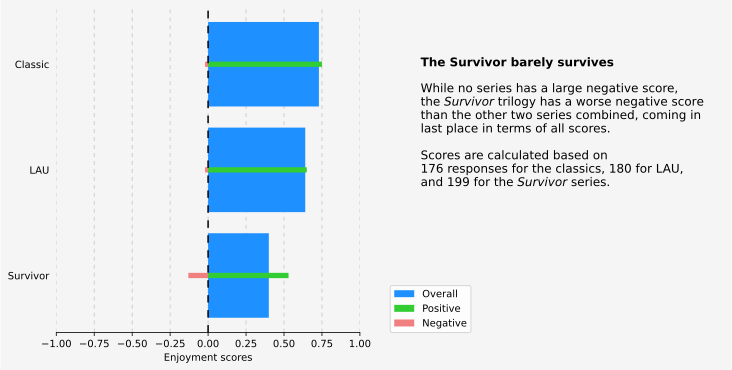

In [140]:
# Make a copy of enjoyment levels, and replace them with their respective scores.
# I removed "ORIENTATION", because it's likely unused. If anything breaks come back and add it, or remove this comment if all is fine.
series_enjoyment = survey[["SEX", "AGE_GROUP", "CLL_OVERSEX", "LIKE_CLASSIC", "LIKE_LAU", "LIKE_SURVIVOR"]].copy()
enjoyment_scale = ({"Not at all": -2,
                   "A little": -1,                  
                   "Somewhat": 0,
                   "Quite a bit": 1,
                   "A lot": 2})
series_enjoyment.replace(enjoyment_scale, inplace = True)

# Calculate enjoyment scores.
enjoyment_scores = pd.DataFrame()
for series in ["CLASSIC", "LAU", "SURVIVOR"]:
    raw_scores = series_enjoyment["LIKE_" + series]
    series_score = calculate_enjoyment_scores(raw_scores)
    enjoyment_scores[tr_format(series)] = series_score    

# Transpose the enjoyment_scores, so "Positive", "Negative", and "Overall" can later be selected as columns.
enjoyment_scores = enjoyment_scores.transpose()
enjoyment_scores.sort_values("Overall", ascending = True, inplace = True);

# Plot the enjoyment scores.
fig_enj, (ax_enj, ax_enj_txt) = plt.subplots(1, 2, figsize = (12, 6), facecolor = "whitesmoke")
cartesian(ax_enj, xlabel = "Enjoyment scores", spines = "b", grid = (True, False), xlim = (-1, 1))
barh_chart(ax_enj, enjoyment_scores["Overall"], colors = posneg_color["neutral"], label = "Overall")
barh_chart(ax_enj,  enjoyment_scores["Positive"], colors = posneg_color["positive"], height = -0.05, label = "Positive")
barh_chart(ax_enj,  enjoyment_scores["Negative"], colors = posneg_color["negative"], height = -0.05, label = "Negative")
ax_enj.axvline(0, color = "k", dashes = (5,5))
ax_enj.tick_params(axis = "y", which = "both", left = False)
legend_setup(ax_enj, loc = (1.1, 0))

aside(ax_enj_txt, "The Survivor barely survives", ("While no series has a large negative score,\n"
                                                   "the $\it{Survivor}$ trilogy has a worse negative score\n"
                                                   "than the other two series combined, coming in\n"
                                                   "last place in terms of all scores.\n\n"
                                                  
                                                  "Scores are calculated based on\n"
                                                  "176 responses for the classics, 180 for LAU,\n"
                                                  "and 199 for the $\it{Survivor}$ series."
                                                  ))

_`Figure 5. Enjoyment scores for the three Tomb Raider series.`_

Considering that _Survivor_ games are amongst the most recent and modern _Tomb Raider_ games, it is interesting that they scored so relatively badly. When breaking the scores down by age groups, it does seem that **younger players enjoyed the _Survivor_ series more than most older ones,** with the exception of the 45+ cohort. What is most noteworthy is that **Classic games—the most recent of which was released in 2003—still vastly outperform _Survivor_ games across all cohorts,** as do LAU games. (Note that this breakdown is to be taken with a grain of salt, because some age cohorts are much smaller than others.)

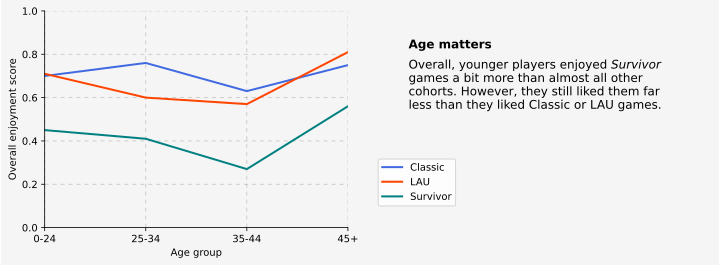

In [141]:
# Overall and negative enjoyment scores by age.
series_enjoyment_byage = series_enjoyment.loc[series_enjoyment["AGE_GROUP"] != "Doesn't say", "AGE_GROUP" : "LIKE_SURVIVOR"].groupby("AGE_GROUP")
neg_enjoyment_scores_byage = pd.DataFrame()
overall_enjoyment_scores_byage = pd.DataFrame()

for group in series_enjoyment_byage.groups:
    for series in ["CLASSIC", "LAU", "SURVIVOR"]:
        raw_scores = series_enjoyment_byage.get_group(group)["LIKE_" + series]
        series_score = calculate_enjoyment_scores(raw_scores)        
        neg_enjoyment_scores_byage.at[group, tr_format(series)] = series_score["Negative"] 
        overall_enjoyment_scores_byage.at[group, tr_format(series)] = series_score["Overall"] 
        
# Plot overall scores by age.
fig_enj_score_byage, (ax_overall_score_byage, ax_overall_score_byage_txt) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")

cartesian(ax_overall_score_byage, xlabel = "Age group", ylabel = "Overall enjoyment score", spines = "lb", xlim = (0, 3), ylim = (0, 1))
for series in ["classic", "lau", "survivor"]:
    line_chart(ax_overall_score_byage, overall_enjoyment_scores_byage[tr_format(series)], color = tr_color[series], label = tr_format(series))
legend_setup(ax_overall_score_byage, loc = (1.1, 0.1))

aside(ax_overall_score_byage_txt, "Age matters", ("Overall, younger players enjoyed $\it{Survivor}$ \n"
                                                  "games a bit more than almost all other\n"
                                                  "cohorts. However, they still liked them far\n"
                                                  "less than they liked Classic or LAU games."))

_`Figure 6. Enjoyment scores for each Tomb Raider series, by age group.`_

**The situation is especially bad for the _Survivor_ series when looking at negative scores,** which while not huge, are the worst across all age cohorts. The negative score of Classic and LAU games, instead, is nearly zero across all cohorts.

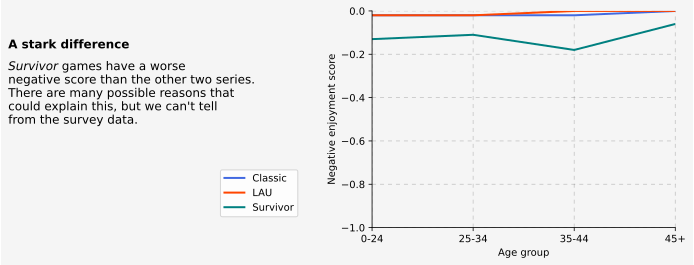

In [142]:
fig_enj_score_byage, (ax_neg_score_byage_txt, ax_neg_score_byage) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")

aside(ax_neg_score_byage_txt, "A stark difference", ("$\it{Survivor}$ games have a worse\n"
                                                     "negative score than the other two series. \n"
                                                     "There are many possible reasons that \n"
                                                     "could explain this, but we can't tell\n"
                                                     "from the survey data."))

cartesian(ax_neg_score_byage, xlabel = "Age group", ylabel = "Negative enjoyment score", spines = "lb", xlim = (0, 3), ylim = (-1, 0))
for series in ["classic", "lau", "survivor"]:
    line_chart(ax_neg_score_byage, neg_enjoyment_scores_byage[tr_format(series)], color = tr_color[series], label = tr_format(series))
legend_setup(ax_neg_score_byage, loc = (-0.5, 0.05))

_`Figure 7. Negative enjoyment score for each Tomb Raider series, by age group.`_

#### Which series did female players like better?

We can now attempt to answer the first question I mentioned in the introduction: **did CLL's exaggerated sex appeal prevent female players from enjoying Classic and LAU _Tomb Raider_ games? Did they like _Survivor_ games better?** Let's start by seeing how much they enjoyed each series, and then let's try to draw a comparison with male players.

In the charts below, we're only considering female respondents who played each specific series. For this reason, the `Didn't play` option isn't included, and the percentages on the right-hand chart refer to the total number of female respondents who played the specific series. For example, the first bar on the left of the second chart is saying that about 69% of the female respondents who played the Classic series liked it `A lot`. On the right-hand chart, bars of the same color add up to 100%.

Note that the total number of female respondent is 62, but not all of them are necessarily represented below because of the lack of the `Didn't play` option.

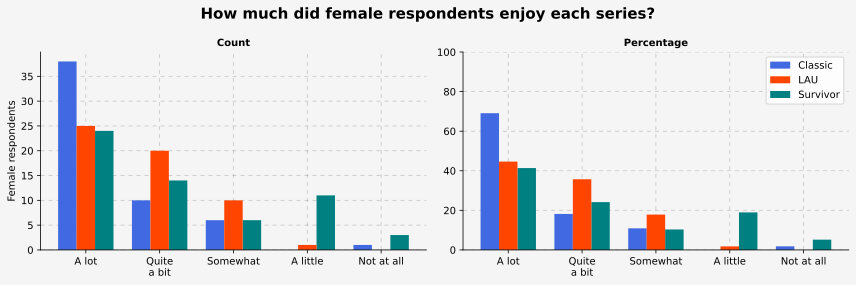

In [143]:
survey_fem = survey.query("SEX == 'Female'")
fig_female_enj, (ax_female_enj_counts, ax_female_enj_pct) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")
series_enjoyment_bars(fig_female_enj, ax_female_enj_counts, ax_female_enj_pct, survey_fem, "Female respondents", "How much did female respondents enjoy each series?", False)

_`Figure 8. Respondents' enjoyment of each Tomb Raider series, in absolute and percentage terms. Females only.`_

`Figure 8` shows a similar story as `Figure 4`: Classic _Tomb Raider_ is in the lead, while _Survivor_ trails behind. This can also be seen by looking at the enjoyment scores for both sexes.

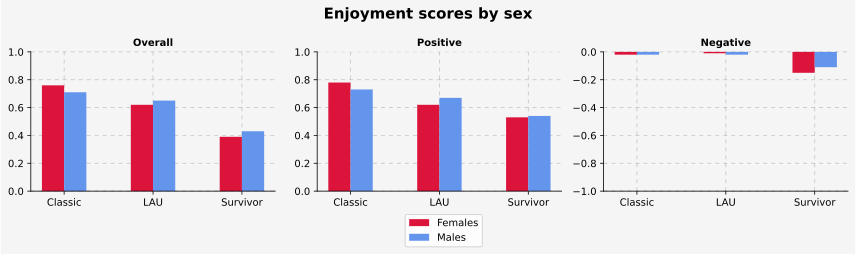

In [144]:
# Enjoyment scores by sex. (Males and females only; oher groups too small.)
series_enjoyment_males = series_enjoyment.loc[series_enjoyment["SEX"] == "Male", "LIKE_CLASSIC" : "LIKE_SURVIVOR"]
series_enjoyment_females = series_enjoyment.loc[series_enjoyment["SEX"] == "Female", "LIKE_CLASSIC" : "LIKE_SURVIVOR"]

pos_enjoyment_scores_bysex = pd.DataFrame()
neg_enjoyment_scores_bysex = pd.DataFrame()
overall_enjoyment_scores_bysex = pd.DataFrame()

for series in ["CLASSIC", "LAU", "SURVIVOR"]:
        raw_scores_males = series_enjoyment_males["LIKE_" + series]
        series_score_males = calculate_enjoyment_scores(raw_scores_males)        
        
        raw_scores_females = series_enjoyment_females["LIKE_" + series]
        series_score_females = calculate_enjoyment_scores(raw_scores_females)        
        
        pos_enjoyment_scores_bysex.at[tr_format(series), "Males"] = series_score_males["Positive"]
        pos_enjoyment_scores_bysex.at[tr_format(series), "Females"] = series_score_females["Positive"]
        
        neg_enjoyment_scores_bysex.at[tr_format(series), "Males"] = series_score_males["Negative"] 
        neg_enjoyment_scores_bysex.at[tr_format(series), "Females"] = series_score_females["Negative"]
        
        overall_enjoyment_scores_bysex.at[tr_format(series), "Males"] = series_score_males["Overall"] 
        overall_enjoyment_scores_bysex.at[tr_format(series), "Females"] = series_score_females["Overall"]
        
# Plot enjoyment score by sex.
fig_enj_score_bysex, (ax_overall_score_bysex, ax_pos_score_bysex, ax_neg_score_bysex ) = plt.subplots(1, 3, figsize = (12, 4), facecolor = "whitesmoke")
fig_enj_score_bysex.suptitle("Enjoyment scores by sex", fontproperties = suptitle_fontprops)

cartesian(ax_overall_score_bysex, spines = "lb", title = "Overall", ylim = (0, 1))
bar_chart(ax_overall_score_bysex, overall_enjoyment_scores_bysex["Females"], sex_color["female"], align = "edge", width = -0.25, label = "Females")
bar_chart(ax_overall_score_bysex, overall_enjoyment_scores_bysex["Males"], sex_color["male"], align = "edge", width = 0.25, label = "Males")    

cartesian(ax_pos_score_bysex, spines = "lb", title = "Positive", ylim = (0, 1))
bar_chart(ax_pos_score_bysex, pos_enjoyment_scores_bysex["Females"], sex_color["female"], align = "edge", width = -0.25, label = "Females")
bar_chart(ax_pos_score_bysex, pos_enjoyment_scores_bysex["Males"], sex_color["male"], align = "edge", width = 0.25, label = "Males")    
legend_setup(ax_pos_score_bysex, loc = (0.36, -0.4))

cartesian(ax_neg_score_bysex, spines = "lb", title = "Negative", ylim = (-1, 0))
bar_chart(ax_neg_score_bysex, neg_enjoyment_scores_bysex["Females"], sex_color["female"], align = "edge", width = -0.25, label = "Females")
bar_chart(ax_neg_score_bysex, neg_enjoyment_scores_bysex["Males"], sex_color["male"], align = "edge", width = 0.25, label = "Males")  

fig_enj_score_bysex.tight_layout()

_`Figure 9. Enjoyment scores by sex.`_

Although not by a lot, **female respondents liked Classic _Tomb Raider_ games more than males and far more than they liked _Survivor_ games.** They liked LAU less than males, but still a lot more than they liked the _Survivor_ trilogy. The negative score of the _Survivor_ trilogy for females is -0.15 against -0.11 for the males, and it's worth noting that this is the only case where the female negative score is worse than the male one.

**These data appear to contradict the idea that women didn't fancy older _Tomb Raider_ games very much;** in some cases, they liked them more than the men did. If, for whatever reason, _Survivor_ games were supposed to appeal to women more than previous games had, that doesn't seem to have worked out either—at least not in this sample.

##### Role of CLL's sex appeal

The results above don't clarify the role that the appearance of Classic/LAU Lara might have played in how much female players enjoyed older _Tomb Raider_ games. To try to determine that, it's worth taking a look at their enjoyment scores, categorised by their opinion on CLL's oversexualisation. In the charts below, `OSX-yes` means that the respondents thought CLL was oversexualised, and similarly for `OSX-no`; `OSX-unsure` is not of interest, so I left it out. 

Note that, because of the similarity between Classic and LAU Lara, respondents weren't asked about them separately; rather, they were asked if Classic _and/or_ LAU Lara were oversexualised. In hindsight, it would have been better to ask about them separately, because for example a respondent's opinion on Classic Lara will hardly affect her enjoyment of LAU games.

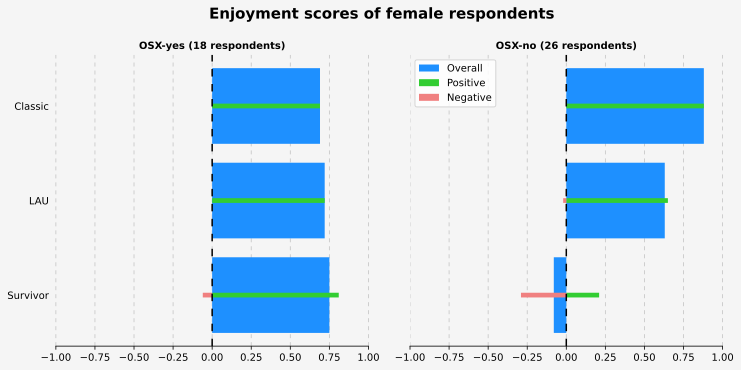

In [145]:
# Select only female players who have played all three series.
fem_all_series = series_enjoyment.query("SEX == 'Female'").query('LIKE_SURVIVOR != "Didn\'t play"').query('LIKE_LAU != "Didn\'t play"').query('LIKE_CLASSIC != "Didn\'t play"')
fem_all_series_byosx = fem_all_series.groupby("CLL_OVERSEX")
n_yes = fem_all_series_byosx.size()["Yes"]
n_no = fem_all_series_byosx.size()["No"]

fem_all_series_osx_yes_scores = pd.DataFrame()
fem_all_series_osx_no_scores = pd.DataFrame()

for series in ["CLASSIC", "LAU", "SURVIVOR"]:
    raw_scores = fem_all_series_byosx["LIKE_" + series]    
    raw_scores_yes = raw_scores.get_group("Yes")
    raw_scores_no = raw_scores.get_group("No")
    
    series_scores_yes = calculate_enjoyment_scores(raw_scores_yes)
    series_scores_no = calculate_enjoyment_scores(raw_scores_no)
    
    fem_all_series_osx_yes_scores[tr_format(series)] = series_scores_yes
    fem_all_series_osx_no_scores[tr_format(series)] = series_scores_no

# Transpose the enjoyment score dataframes so that "Positive", "Negative", and "Overall" can be selected as column later on. 
# Reindex them so that the display order is the same for both.
fem_all_series_osx_yes_scores = fem_all_series_osx_yes_scores.transpose().reindex(["Survivor", "LAU", "Classic"])
fem_all_series_osx_no_scores = fem_all_series_osx_no_scores.transpose().reindex(["Survivor", "LAU", "Classic"])

# Plot the enjoyment scores for female players.
fig_enj_females, (ax_enj_females_osx_yes, ax_enj_females_osx_no) = plt.subplots(1, 2, figsize = (10, 5), facecolor = "whitesmoke")
fig_enj_females.suptitle("Enjoyment scores of female respondents", fontproperties = suptitle_fontprops, y = 1.02)
fig_enj_females.tight_layout()

def plot_female_enjoyment_scores_byosx(ax, data, osx, resp):
    """Utility function that plots positive, negative, and overall enjoyment scores on `ax`.
    `ax`is a matplotlib axes.
    `data` is a dataframe with the data to plot.
    `osx` is one of "yes", "no", or "unsure".
    `resp` is the number of respondents per osx option.
    """
    cartesian(ax, title = "OSX-{} ({} respondents)".format(osx, resp), spines = "b", grid = (True, False), xlim = (-1, 1))
    barh_chart(ax, data["Overall"], colors = posneg_color["neutral"], label = "Overall")
    barh_chart(ax, data["Positive"], colors = posneg_color["positive"], height = -0.05, label = "Positive")
    barh_chart(ax, data["Negative"], colors = posneg_color["negative"], height = -0.05, label = "Negative")
    ax.axvline(0, color = "k", dashes = (5,5))
    ax.tick_params(axis = "y", which = "both", left = False)
    
# OSX-yes
plot_female_enjoyment_scores_byosx(ax_enj_females_osx_yes, fem_all_series_osx_yes_scores, "yes", n_yes)

# OSX-no
plot_female_enjoyment_scores_byosx(ax_enj_females_osx_no, fem_all_series_osx_no_scores, "no", n_no)
ax_enj_females_osx_no.set_yticks(ax_enj_females_osx_no.get_yticks(), [])
legend_setup(ax_enj_females_osx_no)

_`Figure 10. Enjoyment scores for OSX-yes and OSX-no female players who have played all three series.`_

In the charts above, only female players who have played all three series are considered, so, we can anyway compare all the different scores to each other in a reliable way—though any conclusions apply only to the sample.

At a glance, a few things stand out:

- **neither `OSX-yes`, nor `OSX-no` respondents scored Classic games negatively.** The score of `OSX-no` respondents is however somewhat higher. What this might suggest is that even though `OSX-yes` respondents _did_ think that Lara was oversexualised, this didn't prevent them from enjoying the classics; they might, however, have enjoyed them _more_ had Lara been less sexualised in their opinion.

- LAU doesn't have much of a negative score either, but its situation is, in a way, opposite to that of the classics: `OSX-yes` respondents scored it slightly higher than they did the classics, though the difference is minimal. `OSX-no` respondents scored it quite a bit lower, but the reason is probably unrelated to their `OSX` opinion. (Unless they didn't enjoy LAU that much because they didn't think LAU Lara was sufficiently oversexualised!)

- _Survivor_ scores a bit higher than the other two series amongst `OSX-yes` respondents, but **the `OSX-no` folks are much more interesting in that they disliked _Survivor_ enough to bring its overall score to the negative side.**

None of this can definitively quantify how much CLL's alleged oversexualisation the female fanbase's enjoyment of any _Tomb Raider_ series. Without asking more targeted questions, we can't rule out that the reason any respondent liked or disliked a certain series had nothing to do with their opinion on CLL's oversexualisation. However, **it seems improbable that `OSX-yes` respondents actually enjoyed the Classic series less than they might have because they thought Lara was oversexualised;** LAU Lara was every bit of a _femme fatale_ as Classic Lara (if not more), yet the same eighteen `OSX-yes` respondents rated the LAU series a bit higher than they did the classics. The fact that the score of `OSX-no` respondents is higher may well be an artefact due to the different sample sizes (both of which are rather small to begin with), and only a much larger sample could resolve this question.

Speaking of _Survivor_, the relatively large negative score given to it by `OSX-no` respondents—especially compared to the tiny negative score of the `OSX-yes` camp—suggests that **not liking _Survivor_ games very much and thinking CLL was _not_ oversexualised correlate**, at least among female respondents. This is actually something that we'll see more in detail in another section; for now, we can conclude this section by having a look at how much female respondents enjoyed each series, in absolute and percentage terms, depending on their `OSX` stance.

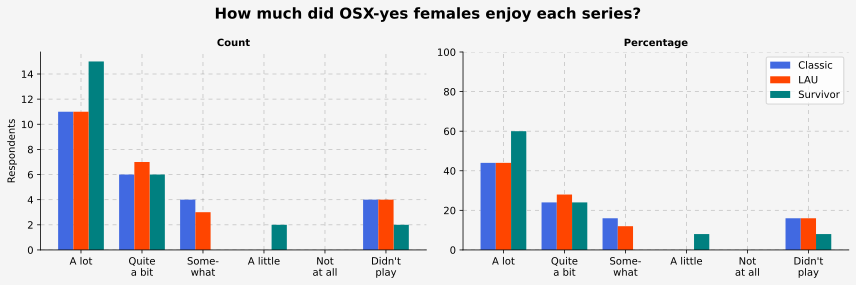

In [146]:
# Compute series enjoyment counts for female players only, osx-yes.
survey_fem_osx_yes = survey_fem.query("CLL_OVERSEX == 'Yes'")

fig_fem_enj_osx_yes, (ax_fem_enj_osx_yes_count, ax_fem_enj_osx_yes_pct) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")
series_enjoyment_bars(fig_fem_enj_osx_yes, ax_fem_enj_osx_yes_count, ax_fem_enj_osx_yes_pct, survey_fem_osx_yes, "Respondents", "How much did OSX-yes females enjoy each series?", True)

_`Figure 11. Enjoyment of each Tomb Raider series by OSX-yes female respondents, in absolute and percentage terms.`_

Relatively many `OSX-yes` female respondents liked _Survivor_ `A lot`, and their opinion of the series is overall rather favourable. The classics and LAU don't have it too bad, but this is the only instance we've seen so far where _Survivor_ is liked `A lot` by more respondents than the other two series. In `Figure 12` below, it's fairly obvious that more `OSX-no` respondents had a very positive experience with the classics, and that their opinion of _Survivor_ is much more fragmented than it is amongst `OSX-yes` respondents.

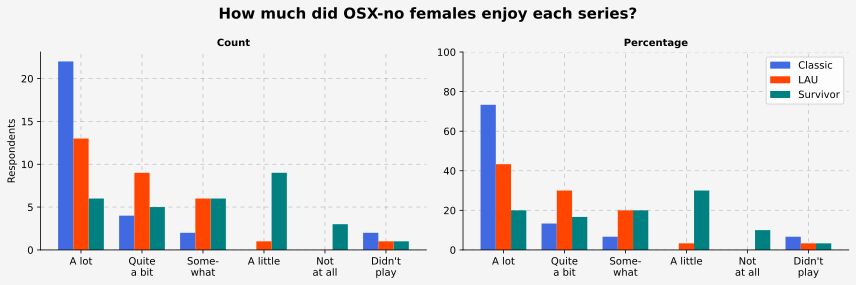

In [147]:
# Compute series enjoyment counts for female players only, osx-no.
survey_fem_osx_no = survey_fem.query("CLL_OVERSEX == 'No'")
fig_fem_enj_osx_no, (ax_fem_enj_osx_no_count, ax_fem_enj_osx_no_pct) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")
series_enjoyment_bars(fig_fem_enj_osx_no, ax_fem_enj_osx_no_count, ax_fem_enj_osx_no_pct, survey_fem_osx_no, "Respondents", "How much did OSX-no females enjoy each series?", True)

_`Figure 12. Enjoyment of each Tomb Raider series by OSX-no female respondents, in absolute and percentage terms.`_

### The fandom's favourite Lara is still Classic Lara

According to [Rhianna Pratchett](https://www.gamedeveloper.com/design/rebooting-lara-rhianna-pratchett-on-writing-for-i-tomb-raider-i-)—who was in charge of reimagining Lara Croft in her _Survivor_ incarnation—one of the reasons why Lara's character went through such an extensive revamp is that her previous persona was no longer relatable for modern players. According to [other critics](https://thenib.com/lara-croft-boob-raider/), Survivor Lara is more relatable for female players given her more realistic figure and the focus of the games on her inner struggles.

To find out if this was true, I asked respondents to choose a single version of Lara as their favourite, considering her appearance, personality, and backstory. If respondents had no preference, they could say so. The data suggests that both Rhianna Pratchett and the other critics might be incorrect in their conclusions.

#### Overall preferences

Across the whole sample, **Classic Lara is without a doubt the favourite**, while Survivor Lara and LAU Lara almost tie. Only short of 8% of the respondents had no preferences.

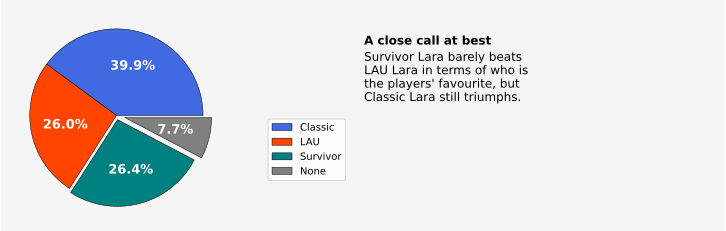

In [148]:
# Favourite Lara across whole sample.
fav_lara = (100 * survey["FAVOURITE_LARA"].value_counts(normalize = True)).round(1)
fig_fav_lara, (ax_fav_lara, ax_fav_lara_txt) = plt.subplots(1, 2, figsize = (14, 4), facecolor = "whitesmoke")
pie_chart(ax_fav_lara, fav_lara.reindex(["Classic", "LAU", "Survivor", "None"]), tr_color, explode = [0, 0, 0.05, 0.1])
legend_setup(ax_fav_lara, loc = (1.2, 0.2))
aside(ax_fav_lara_txt, "A close call at best", ("Survivor Lara barely beats\n"
                                                "LAU Lara in terms of who is\n"
                                                "the players' favourite, but\n"
                                                "Classic Lara still triumphs. "))

_`Figure 13. Preferences for each version of Lara in the sample, in percentages.`_

It's reasonable to assume that the responses in the sample are independent of each other, and given the sample size and the observed percentages, our sample is sufficiently representative to estimate how well the sample preferences reflect the entire fandom's preferences.

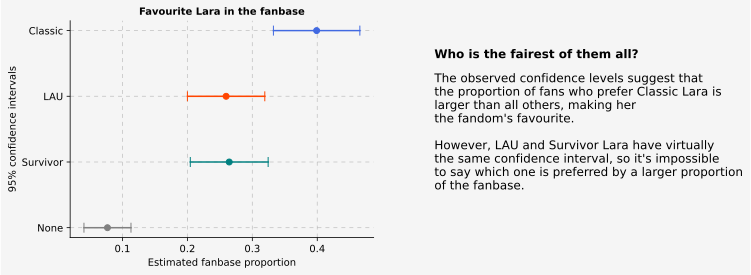

In [149]:
# Calculate the sample proportion and standard error for each version of Lara.
prop_fav_lara = survey["FAVOURITE_LARA"].value_counts(normalize = True)
se_fav_lara = prop_std_err(prop_fav_lara, survey) 

# Calculate 95% confidence intervals and custom-sort them so that the chart shows Classic, LAU, Survivor, and None top-to-bottom.
fav_lara_conf_intervals = build_confidence_intervals(prop_fav_lara, se_fav_lara)
fav_lara_conf_intervals = fav_lara_conf_intervals.reindex(["None", "Survivor", "LAU", "Classic"])

# Plot the confidence intervals.
fig_fav_lara_intvl, (ax_fav_lara_intvl, ax_fav_lara_intvl_aside) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")
cartesian(ax_fav_lara_intvl, xlabel = "Estimated fanbase proportion", ylabel = "95% confidence intervals", spines = "lb", title = "Favourite Lara in the fanbase")
confidence_intervals(ax_fav_lara_intvl, fav_lara_conf_intervals, tr_color)
aside(ax_fav_lara_intvl_aside, "Who is the fairest of them all?", "The observed confidence levels suggest that\n"
                                                                  "the proportion of fans who prefer Classic Lara is\n"
                                                                  "larger than all others, making her\nthe fandom's favourite.\n\n"
                                                                  "However, LAU and Survivor Lara have virtually\n"
                                                                  "the same confidence interval, so it's impossible\n"
                                                                  "to say which one is preferred by a larger proportion\nof the fanbase.")

_`Figure 14. Confidence intervals for estimated percentages of preferences for each version of Lara.`_

In the chart above, the round dots are the proportions observed in our sample, and they're our best estimates for the corresponding proportions at a fandom level. The horizontal lines are 95% confidence intervals, where the real value of each fandom-level proportion likely lies. For example, our best estimate for the proportion of the fandom that prefers Classic Lara is about 0.4 (the same as in our sample), and we're 95% sure that the real value of this proportion lies somewhere in its confidence interval—that is, between 0.33 and 0.46.

Classic Lara's confidence interval is to the right of all others and doesn't overlap with any of them; this means that, at a 95% confidence level, the proportion of the entire _Tomb Raider_ fandom that prefers Classic Lara is larger than the proportion that prefers LAU, Survivor, or no Lara. The intervals are however fairly large, and had we chosen a higher confidence level, they'd be larger still and we would likely see some overlap. A larger number of respondents would mitigate this problem and give a more accurate answer, but this is still fairly convincing evidence that, **while no version of Lara is the absolute majority's favorite, Classic Lara is liked by more fans than any other.**

#### Preferences by age

When broken down by age, these preferences reveal trends that should perhaps be expected: **the older a player is, the more likely they are to prefer Classic Lara; similarly, older players are less likely to prefer Survivor Lara,** although this trend is less pronounced. This may be attributed to the fact that Classic Lara was probably the "first" Lara  for older players, whereas Survivor Lara is more likely to have been a younger player's first. Nonetheless, Classic Lara is by far the favourite of every age cohort with the exception of the youngest one; those players prefer Survivor Lara to her, but not by much, and in any case, their prefer LAU Lara to Survivor Lara.

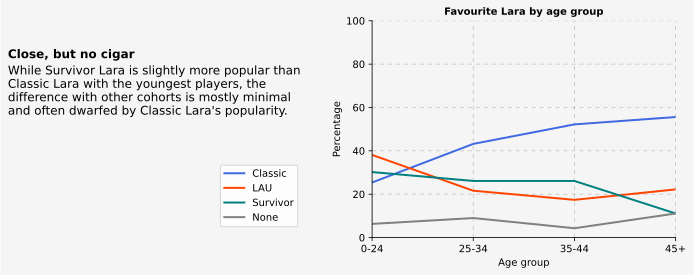

In [150]:
# Favourite Lara by age cohorts.
fav_lara_byage = (100 * pd.crosstab(survey["AGE_GROUP"], survey["FAVOURITE_LARA"], normalize = "index")).round(1)
# Exclude whoever didn't say their age.
fav_lara_byage = fav_lara_byage.query('AGE_GROUP != "Doesn\'t say"')

fig_fav_lara_byage, (ax_fav_lara_byage_txt, ax_fav_lara_byage ) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")

aside(ax_fav_lara_byage_txt, "Close, but no cigar", ("While Survivor Lara is slightly more popular than\n"
                                                     "Classic Lara with the youngest players, the\n"
                                                     "difference with other cohorts is mostly minimal\n"
                                                     "and often dwarfed by Classic Lara's popularity."))

cartesian(ax_fav_lara_byage, xlabel = "Age group", ylabel = "Percentage", spines = "lb", xlim = (0, 3), ylim = (0, 100), title = "Favourite Lara by age group")
for lara in ["Classic", "LAU", "Survivor", "None"]:
    line_chart(ax_fav_lara_byage, fav_lara_byage[lara], color = tr_color[lara.lower()], label = lara)
legend_setup(ax_fav_lara_byage, loc = (-0.5, 0.05))

_`Figure 15. Favourite versions of Lara across the entire sample, by age cohort.`_

It's interesting that Survivor Lara is preferred to LAU Lara between the ages of 25 and 44. LAU Lara is a great deal more similar to Classic Lara than Survivor Lara in every respect, and I would have expected her popularity trend to resemble that of Classic Lara more closely. However, it's not possible to explain these trends with the data from this survey; for that, more specific questions would be needed. It's also possible that a larger sample would suggest that Survivor Lara is much more popular than shown here with younger players, who are likely underrepresented in this sample.

#### Preferences by sex and orientation

Things get more interesting when looking at how the players' preferences change with sex instead. Despite Classic and LAU Lara's alleged oversexualisation and Survivor Lara's more realistic appearance, quite surprisingly **Survivor Lara is much more popular amongst males than females, and vice-versa for Classic and LAU Lara.**

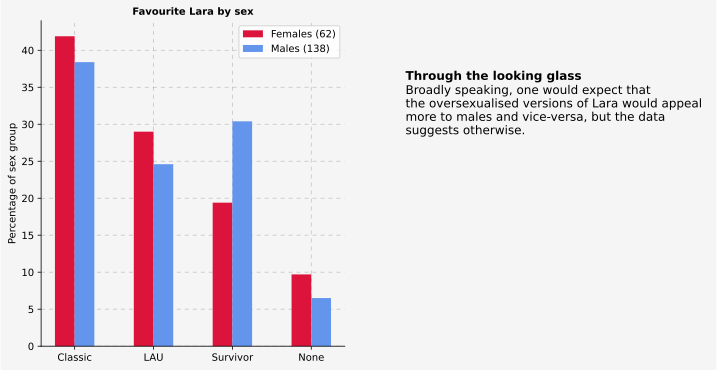

In [151]:
# Favourite Lara by sex. (Males and females only; other respondents were too few.)
fav_lara_bysex = survey.loc[survey["SEX"].isin(["Female", "Male"]), ["SEX", "FAVOURITE_LARA"]]

# Count of male and female respondents in the view above.
fav_lara_bysex_females = len(fav_lara_bysex.loc[fav_lara_bysex["SEX"] == "Female"])
fav_lara_bysex_males = len(fav_lara_bysex.loc[fav_lara_bysex["SEX"] == "Male"])

# Preferences expressed for each Lara, in absolute and percentage terms.
fav_lara_bysex_count = pd.crosstab(fav_lara_bysex["FAVOURITE_LARA"], fav_lara_bysex["SEX"])
fav_lara_bysex_pct = (100 * pd.crosstab(fav_lara_bysex["FAVOURITE_LARA"], fav_lara_bysex["SEX"], normalize = "columns")).round(1)
fav_lara_bysex_pct = fav_lara_bysex_pct.reindex(["Classic", "LAU", "Survivor", "None"])

fig_fav_lara_bysex, (ax_fav_lara_bysex, ax_fav_lara_bysex_txt) = plt.subplots(1, 2, figsize = (12, 6), facecolor = "whitesmoke")
cartesian(ax_fav_lara_bysex, title = "Favourite Lara by sex", ylabel = "Percentage of sex group")
bar_chart(ax_fav_lara_bysex, fav_lara_bysex_pct["Female"], sex_color["female"], align = "edge", width = -0.25, label = "Females ({})".format(fav_lara_bysex_females))
bar_chart(ax_fav_lara_bysex, fav_lara_bysex_pct["Male"], sex_color["male"], align = "edge", width = 0.25, label = "Males ({})".format(fav_lara_bysex_males))
legend_setup(ax_fav_lara_bysex)
aside(ax_fav_lara_bysex_txt, "Through the looking glass", ("Broadly speaking, one would expect that\n"
                                                           "the oversexualised versions of Lara would appeal\n"
                                                           "more to males and vice-versa, but the data\nsuggests otherwise."))

_`Figure 16. Preferences for each version of Lara, by sex. (Percentages.)`_

Paradoxically, Survivor Lara is the _least_ favourite by female respondents, and more importantly, female respondents like her significantly less than male respondents do; while Classic Lara is again the winner regardless of sex, males prefer Survivor Lara to LAU Lara. Overall, **this contradicts the idea that Classic and LAU Lara appeal to male players more than to female ones, or that they were unlikeable to female players.**

The above is true of the _sample_; to see how well it might apply to the fandom, we can build again 95% confidence intervals. The number of respondents of either sex who expressed no preference is too low to build a reliable confidence interval, so we are going to leave that option out. This means that, rather than to the whole fandom, the results we'll get apply to the part of the fandom that _does_ have a favourite version of Lara.

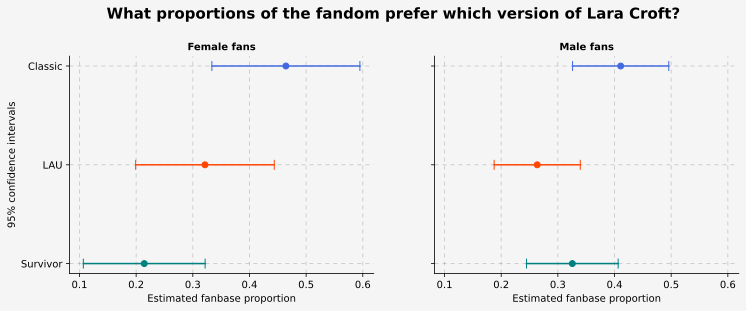

In [152]:
# Sample proportions for each possible favourite Lara, excluding the "None" option.
females_no_none = fav_lara_bysex.query("SEX == 'Female' and FAVOURITE_LARA != 'None'")
males_no_none = fav_lara_bysex.query("SEX == 'Male' and FAVOURITE_LARA != 'None'")

prop_fav_lara_f = females_no_none["FAVOURITE_LARA"].value_counts(normalize = True)
prop_fav_lara_m = males_no_none["FAVOURITE_LARA"].value_counts(normalize = True)

# Standard errors for favourite Lara sample proportions, female and male respondents.
se_prop_fav_lara_f = prop_std_err(prop_fav_lara_f, females_no_none)
se_prop_fav_lara_m = prop_std_err(prop_fav_lara_m, males_no_none)

# Calculate 95% confidence intervals for both males and females, and custom-sort them so that the chart shows Classic, LAU, and Survivor top-to-bottom.
intervals_f = build_confidence_intervals(prop_fav_lara_f, se_prop_fav_lara_f)
intervals_f = intervals_f.reindex(index = ["Survivor", "LAU", "Classic"])

intervals_m = build_confidence_intervals(prop_fav_lara_m, se_prop_fav_lara_m)
intervals_m = intervals_m.reindex(index = ["Survivor", "LAU", "Classic"])

# Plot the confidence intervals.
fig_fav_lara_intvl_bysex, (ax_fav_lara_intvl_f, ax_fav_lara_intvl_m) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke", sharey = True)
cartesian(ax_fav_lara_intvl_f, xlabel = "Estimated fanbase proportion", ylabel = "95% confidence intervals", spines = "lb", title = "Female fans")
cartesian(ax_fav_lara_intvl_m, xlabel = "Estimated fanbase proportion", ylabel = "", spines = "lb", title = "Male fans")
confidence_intervals(ax_fav_lara_intvl_f, intervals_f, tr_color)
confidence_intervals(ax_fav_lara_intvl_m, intervals_m, tr_color)

# Make x-axis uniform across charts.
ax_fav_lara_intvl_m.set_xlim(ax_fav_lara_intvl_f.get_xlim())

fig_fav_lara_intvl_bysex.suptitle("What proportions of the fandom prefer which version of Lara Croft?", fontproperties = suptitle_fontprops, y = 1.05);

_`Figure 17. Confidence intervals for the proportion of preferences for each version of Lara at a fandom level, by sex.`_

Looking at the female fandom only, there is significant overlap between Classic and LAU Lara's intervals, which means that the proportion of female fans who prefer LAU Lara might be larger than that of those who prefer Classic Lara. Similarly, Survivor Lara might well be liked by a larger proportion of female fans than LAU Lara, but **as there's no overlap between Classic's and _Survivor_ Lara's confidence intervals, at a fandom level the latter is very likely less popular with female players than the former.** This also means that Survivor Lara is unlikely to be the favourite of the female fandom, because the largest possible proportion of her female fans is smaller than the smallest possible proportion of Classic Lara's female fans.

Turning our attention to the male fandom, we see that, given the overlaps, any version of Lara might in principle be that with the largest proportion of male preferences; in particular, **it's quite possible for the proportion of Survivor Lara's male fans to be larger than both that of LAU and Classic Lara's male fans.** 

Ultimately, these findings suggest that **Survivor Lara can hardly be the favourite of female players, but might well be the favourite of male players.** As we noted before, this is the opposite of what we should expect if it is true that Survivor Lara was meant to be more relatable for female players, and that Classic/LAU Lara were designed with male players in mind and alienated female players instead.

Regardless of which version of Lara is the favourite of which sex, `Figure 17` shows that, proportion-wise, more female than male players in the sample prefer Classic and LAU Lara, and vice-versa for Survivor Lara. More precisely, the differences between female and male proportions are as follows:

In [153]:
fav_lara_mf_prop_diff = prop_fav_lara_f - prop_fav_lara_m
fav_lara_mf_prop_diff

Classic     0.053433
LAU         0.057863
Survivor   -0.111296
Name: FAVOURITE_LARA, dtype: float64

These are our best estimates for the differences at a fandom level, and to determine how accurate they are, we'll build again 95% confidence intervals for each of them.

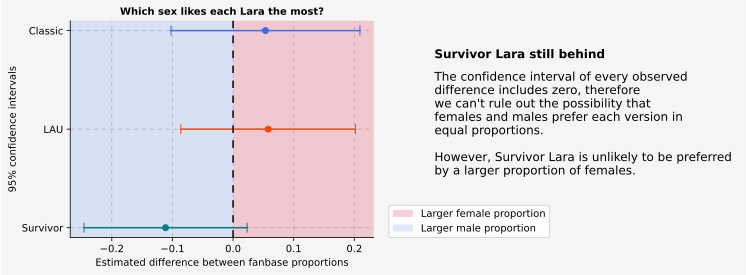

In [154]:
# Standard error for the differences between proportions of female and male players who prefer each given version of Lara.
se_fav_lara_prop_diff = prop_std_err([prop_fav_lara_f, prop_fav_lara_m], [females_no_none, males_no_none])

# Calculate 95% confidence intervals for the differences.
intervals_diff = build_confidence_intervals(fav_lara_mf_prop_diff, se_fav_lara_prop_diff)

# Custom-sort the intervals series so that the chart shows Classic, LAU, Survivor, and None top-to-bottom.
intervals_diff = intervals_diff.reindex(["Survivor", "LAU", "Classic"])

# Plot the confidence intervals.
fig_fav_lara_intvl_diff, (ax_fav_lara_intvl_diff, ax_fav_lara_intvl_diff_txt) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")
cartesian(ax_fav_lara_intvl_diff, xlabel = "Estimated difference between fanbase proportions", ylabel = "95% confidence intervals", spines = "lb", title = "Which sex likes each Lara the most?")
confidence_intervals(ax_fav_lara_intvl_diff, intervals_diff, tr_color)

# Draw 'female' and 'male' patches. 
ax_fav_lara_intvl_diff.axvline(0, color = "k", dashes = (5, 5)) # Separator line.

# Patches origins and dimensions.
xlims = ax_fav_lara_intvl_diff.get_xlim()
ylims = ax_fav_lara_intvl_diff.get_ylim()
patch_height = ylims[1] + 0.1 # + 0.1 extends the patch to the very top edge of the axes.
male_origin = (xlims[0], ylims[0])
male_width = -xlims[0] 
female_origin = (0, ylims[0])
female_width = xlims[1]

female_half = mpl.patches.Rectangle(female_origin, female_width , patch_height, facecolor = sex_color["female"], alpha = 0.2, label = "Larger female proportion")
male_half = mpl.patches.Rectangle(male_origin, male_width, patch_height, facecolor = sex_color["male"], alpha = 0.2, label = "Larger male proportion")
ax_fav_lara_intvl_diff.add_patch(female_half)
ax_fav_lara_intvl_diff.add_patch(male_half)

# Add legend to illustrate the meaning of the patches.
ax_fav_lara_intvl_diff.legend(loc = (1.05, 0))

aside(ax_fav_lara_intvl_diff_txt, "Survivor Lara still behind", ("The confidence interval of every observed\n"
                                                           "difference includes zero, therefore\n"
                                                           "we can't rule out the possibility that\n"
                                                         "females and males prefer each version in\n"
                                                        "equal proportions.\n\n"
                                                      "However, Survivor Lara is unlikely to be preferred\n"
                                                      "by a larger proportion of females."))


_`Figure 18. Confidence intervals for the difference between the proportion of female and male respondents who prefer each version of Lara.`_

The differences in the chart above were computed as `female proportion - male proportion`; for this reason, a positive difference (red patch) means that the female proportion is larger than the male one, and vice-versa for a negative difference (blue patch). A difference of zero means that the two proportions are equal. Zero falls in every observed confidence interval, which means that **the possibility that females and males in the entire fanbase prefer each version of Lara in equal proportions can't be ruled out.** However, the confidence intervals for Classic and LAU Lara lie mostly on the positive side, whereas the Survivor Lara's confidence interval lies almost entirely on the negative side; this makes it probable that Classic and LAU Lara are preferred by a larger proportion of female fans, whereas the proportion of male fans who prefer Survivor Lara is very likely larger than the corresponding female proportion. This, again, bearing in mind that the confidence intervals are rather large due to our small sample size, and therefore these estimates aren't as accurate as they could be. 

 At this point, we can attempt to answer the second question: **do straight males prefer Classic/LAU Lara over Survivor Lara?** Does the respondent's sexual orientation matter, and does the perceived sex appeal of each version of Lara matter?

#### Male players in detail

The results of this section are quite surprising, although we won't be able to generalise all of them beyond the sample to the entire male fanbase.

##### Influence of sexual orientation

The idea that Classic or LAU Lara may in general appeal more than Survivor Lara to straight males specifically is seriously challenged by the preferences expressed by our sample, in which **Survivor Lara is the obvious favourite of straight males.** 

In [155]:
# Favourite Lara for straight males.
fav_lara_straight_males = survey.loc[(survey["SEX"] == "Male") & (survey["ORIENTATION"] == "Straight"), 
                                     ["AGE_GROUP","FAVOURITE_LARA", "CLASSIC_ATTR", "LAU_ATTR", "SURVIVOR_ATTR"]]

fav_lara_straight_males_count = fav_lara_straight_males["FAVOURITE_LARA"].value_counts()
fav_lara_straight_males_pct = ((100 * fav_lara_straight_males["FAVOURITE_LARA"].value_counts(normalize = True))
                               .round(1).map(lambda x: "{}%".format(x)))

# Print summary.
print_header("Favourite Lara for straight males:")
pd.DataFrame(data = {"Percent":fav_lara_straight_males_pct, "Count": fav_lara_straight_males_count})

Favourite Lara for straight males:
----------------------------------


,Percent,Count
Survivor,38.0%,27
LAU,28.2%,20
Classic,26.8%,19
None,7.0%,5


Interestingly, **among non-straight males, Classic Lara pretty much _wipes the floor_ with all other versions.**  While Survivor Lara comes in second place, she's nearly 30 percentage points behind.

In [156]:
# Favourite Lara for non-straight males.
fav_lara_non_straight_males = survey.loc[(survey["SEX"] == "Male") & (survey["ORIENTATION"] != "Straight"), ["AGE_GROUP","FAVOURITE_LARA"]]

fav_lara_non_straight_males_count = fav_lara_non_straight_males["FAVOURITE_LARA"].value_counts()
fav_lara_non_straight_males_pct = ((100 * fav_lara_non_straight_males["FAVOURITE_LARA"].value_counts(normalize = True))
                                   .round(1).map(lambda x: "{}%".format(x)))

# Print summary.
print_header("Favourite Lara for non-straight males:")
pd.DataFrame(data = {"Percent":fav_lara_non_straight_males_pct, "Count": fav_lara_non_straight_males_count})

Favourite Lara for non-straight males:
--------------------------------------


,Percent,Count
Classic,50.7%,34
Survivor,22.4%,15
LAU,20.9%,14
None,6.0%,4


As usual, we're going to build 95% confidence levels to see where we can expect the fandom's true proportions to most likely lie. Once again, too few respondents expressed no preference to build a reliable confidence interval, so we're going to exclude the `None` option, and draw conclusions only about that part of the male fandom that does have a preference.

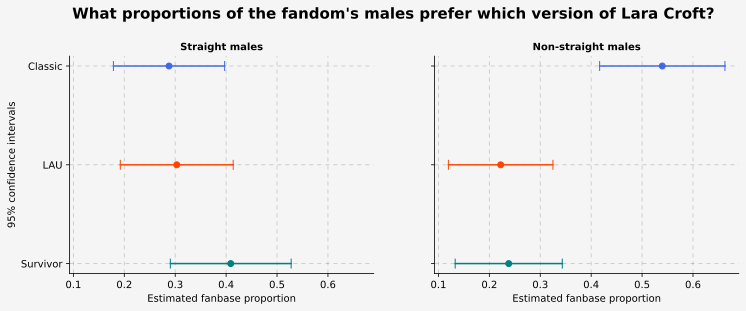

In [157]:
# Calculate standard errors for straight and non-straight males, but remove the `None` option first.
straight_males_no_none = fav_lara_straight_males.query("FAVOURITE_LARA != 'None'")
non_straight_males_no_none = fav_lara_non_straight_males.query("FAVOURITE_LARA != 'None'")

fav_lara_straight_males_prop = straight_males_no_none["FAVOURITE_LARA"].value_counts(normalize = True)
fav_lara_non_straight_males_prop = non_straight_males_no_none["FAVOURITE_LARA"].value_counts(normalize = True)

fav_lara_straight_males_se = prop_std_err(fav_lara_straight_males_prop, straight_males_no_none)
fav_lara_non_straight_males_se = prop_std_err(fav_lara_non_straight_males_prop, non_straight_males_no_none)

# Build 95% confidence intervals, and custom-sort them to show Classic, LAU, and Survivor top-to-bottom.
fav_lara_straight_males_conf_intvls = build_confidence_intervals(fav_lara_straight_males_prop, fav_lara_straight_males_se)
fav_lara_non_straight_males_conf_intvls = build_confidence_intervals(fav_lara_non_straight_males_prop, fav_lara_non_straight_males_se)

fav_lara_straight_males_conf_intvls= fav_lara_straight_males_conf_intvls.reindex(["Survivor", "LAU", "Classic"])
fav_lara_non_straight_males_conf_intvls = fav_lara_non_straight_males_conf_intvls.reindex(["Survivor", "LAU", "Classic"])

# Plot the confidence intervals.
fig_fav_lara_intvl_males, (ax_fav_lara_intvl_straight_males, ax_fav_lara_intvl_non_straight_males) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke", sharey = True)

# Straight
cartesian(ax_fav_lara_intvl_straight_males, xlabel = "Estimated fanbase proportion", ylabel = "95% confidence intervals", spines = "lb", title = "Straight males")
confidence_intervals(ax_fav_lara_intvl_straight_males, fav_lara_straight_males_conf_intvls, tr_color)

# Non-straight
cartesian(ax_fav_lara_intvl_non_straight_males, xlabel = "Estimated fanbase proportion", ylabel = "", spines = "lb", title = "Non-straight males")
confidence_intervals(ax_fav_lara_intvl_non_straight_males, fav_lara_non_straight_males_conf_intvls, tr_color)

# Make x-axis uniform across charts.
ax_fav_lara_intvl_straight_males.set_xlim(ax_fav_lara_intvl_non_straight_males.get_xlim())

fig_fav_lara_intvl_males.suptitle("What proportions of the fandom's males prefer which version of Lara Croft?", fontproperties = suptitle_fontprops, y = 1.05);

_`Figure 19. Confidence intervals for the proportion of male preferences for each version of Lara, by orientation.`_

While Survivor Lara is very much the favourite of straight males in our sample, the confidence intervals don't allow us to conclude that she is such also at a fandom level. All three confidence intervals overlap, so we can't say for sure which version of Lara is preferred by the largest proportion of the straight male fanbase. (Once more, a larger sample would have shrunk the fairly huge intervals and allowed for more accurate estimates.) However, **we're 95% sure that Classic Lara is the favorite of non-straight males in the the fandom**, as her confidence interval is comfortably far away from the other two.

##### Influence of age

The preferences of straight and non-straight males in the sample appear to be influenced by age somewhat. We won't be able to tell if this is true of the whole male fandom, but it's still interesting to see this effect in the sample.

**Survivor Lara's popularity declines steadily with age among straight males, whereas Classic Lara's popularity generally grows,** suggesting that, at least for straight males, a player's favourite Lara tends to be the version he's likely to have seen first. (Older males are more likely to have played Classic games before any others, and vice-versa.)

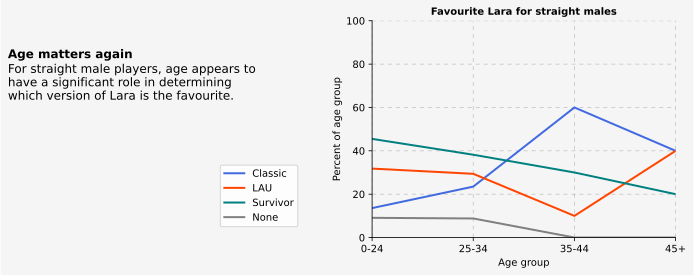

In [158]:
# Favourite Lara for straight males by age
# (Respondents who didn't say their age should be excluded, but all male respondents said it, so we're good.)
fav_lara_straight_males_byage = (100 * pd.crosstab(fav_lara_straight_males["AGE_GROUP"], fav_lara_straight_males["FAVOURITE_LARA"], normalize = "index")).round(1)

fig_fav_lara_straight_males, (ax_fav_lara_straight_males_txt, ax_fav_lara_straight_males ) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")

aside(ax_fav_lara_straight_males_txt, "Age matters again", ("For straight male players, age appears to\n"
                                                            "have a significant role in determining\n"
                                                            "which version of Lara is the favourite."))

cartesian(ax_fav_lara_straight_males, title = "Favourite Lara for straight males", xlabel = "Age group", ylabel = "Percent of age group", spines = "lb", xlim = (0, 3), ylim = (0, 100))
for lara in ["Classic", "LAU", "Survivor", "None"]:
    line_chart(ax_fav_lara_straight_males, fav_lara_straight_males_byage[lara], color = tr_color[lara.lower()], label = lara)
legend_setup(ax_fav_lara_straight_males, loc = (-0.5, 0.05))

_`Figure 20. Percentage of preferences for each version of Lara amongst straight males, by age group.`_

In the case of non-straight males, Classic Lara is _always_ more popular than her competitors, regardless of the respondent's age, while Survivor Lara's popularity would be basically a flat line if it wasn't for the people in the 35-44 cohort, who like her around 7% more than the other cohorts.

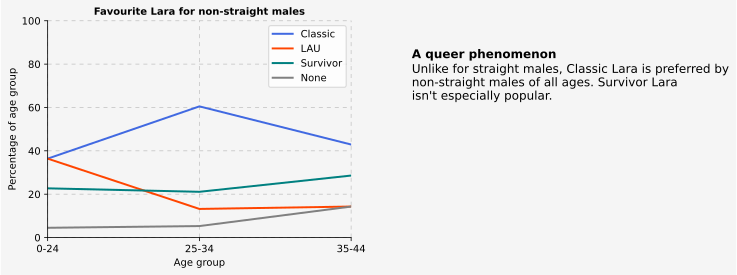

In [159]:
# Favourite Lara for non-straight males by age
fav_lara_non_straight_males_byage = (100 * pd.crosstab(fav_lara_non_straight_males["AGE_GROUP"], fav_lara_non_straight_males["FAVOURITE_LARA"], normalize = "index")).round(1)

fig_fav_lara_non_straight_males_byage, (ax_fav_lara_non_straight_males_byage, ax_fav_lara_non_straight_males_byage_txt ) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")

aside(ax_fav_lara_non_straight_males_byage_txt, "A queer phenomenon", ("Unlike for straight males, Classic Lara is preferred by\n"
                                                                       "non-straight males of all ages. Survivor Lara\n"
                                                                       "isn't especially popular."))

cartesian(ax_fav_lara_non_straight_males_byage, title = "Favourite Lara for non-straight males", xlabel = "Age group", ylabel = "Percentage of age group", spines = "lb", xlim = (0, 2), ylim = (0, 100))
for lara in ["Classic", "LAU", "Survivor", "None"]:
    line_chart(ax_fav_lara_non_straight_males_byage, fav_lara_non_straight_males_byage[lara], color = tr_color[lara.lower()], label = lara)
legend_setup(ax_fav_lara_non_straight_males_byage)

_`Figure 21. Percentage of preferences for each version of Lara amongst straight males, by age group.`_

##### Influence of sex appeal

We don't yet know whether sex appeal is the main factor influencing which version of Lara is preferred by (straight) males; to figure that out, we need to take into account which versions of Lara were considered attractive by the respondents.

I asked all respondents, regardless of their respective demographics, to specify which versions of Lara, if any, they personally found physically attractive. I did this primarily to see whether people who are attracted to CLL were less or more likely to say that she was oversexualised, but it is also useful to determine how much sex appeal contributes to a player's choice of their favourite Lara. 

Before we proceed, however, an important caveat should be issued: **there is a non-negligible chance that many respondents may have misunderstood my question about Lara's attractiveness.** (Either that, or I must've missed a memo about what "gay" and "straight" mean.) I fully expected gay males not to be attracted to *any* version of Lara, and similarly for straight females. That's not what happened.

In [160]:
def attracted_respondents_count(sex):
    """Returns a series containing the count of how many respondents of the given sex
       are attracted to at least one version of Lara, broken down by sexual orientation.       
       `sex` is the sex of the respondents.
       """
    selected_sex = survey.query("SEX == '{}'".format(sex))
    orientations = selected_sex["ORIENTATION"].unique()

    attracted_respondents = pd.Series(dtype = "int32")
    for orient in orientations:
        # Dateframe listing which Lara's are attractive according to respondents of the given sex of orientation `orient`.
        orient_respondents_attr_laras = selected_sex.query('ORIENTATION == "{}"'.format(orient))[["CLASSIC_ATTR","LAU_ATTR", "SURVIVOR_ATTR"]]    
        # Count all respondents of the given sex and orientation `orient` who find at least one Lara attractive.
        attracted_respondents[orient] = orient_respondents_attr_laras.any(axis = 1).sum()
    return attracted_respondents

print_header("Respondents attracted to one or more versions of Lara:")
pd.DataFrame({"Males": attracted_respondents_count("Male"),
              "Females": attracted_respondents_count("Female")})

Respondents attracted to one or more versions of Lara:
------------------------------------------------------


,Males,Females
Asexual,3,4
Bisexual,14,22
Gay/Lesbian,40,6
Other/Doesn't say,1,1
Straight,65,24


It doesn't seem to make much sense for gay men or straight women to be physically attracted to women, but it's hard to believe so many people would get the question wrong. I'd rather not second-guess the respondents and assume they knew what they were talking about.

In the following, we're going to exclude respondents depending on what version(s) of Lara they find attractive. Age cohorts derived from these subsamples may be too small, so for this reason (and for simplicity), we're not going to split respondents into age cohorts. 

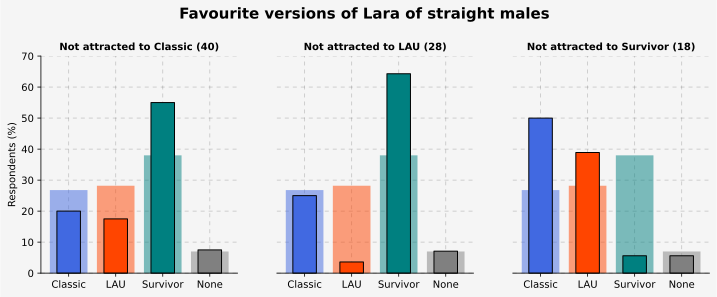

In [161]:
# Draw three charts, one for each excluded version of Lara.
fig_fav_lara_straight_males_byattr, (ax_fav_lara_straight_males_no_cls, 
                                     ax_fav_lara_straight_males_no_lau, 
                                     ax_fav_lara_straight_males_no_srv) = plt.subplots(1, 3, figsize = (12, 4), facecolor = "whitesmoke")
fig_fav_lara_straight_males_byattr.suptitle("Favourite versions of Lara of straight males", fontproperties = suptitle_fontprops, y = 1.05)

# For each Lara, calculate the percentage of straight males of whom they're the favourite.
straight_males_baseline = (100 * fav_lara_straight_males["FAVOURITE_LARA"].value_counts(normalize = True)
                          ).round(1).reindex(["Classic", "LAU", "Survivor", "None"])

# For each Lara, calculate the percentage of straight males of whom they're the favourite, 
#this only counting respondents who are NOT attracted to a given version of Lara.
for lara in ["CLASSIC", "LAU", "SURVIVOR"]:    
    # Pick the right axes to plot to.
    ax = ax_fav_lara_straight_males_no_cls 
    if lara == "LAU": ax = ax_fav_lara_straight_males_no_lau
    if lara == "SURVIVOR": ax = ax_fav_lara_straight_males_no_srv
    
    # Calculate the percentages and total respondents relevant to each excluded version of Lara.
    fav_lara_filtered = fav_lara_straight_males.query("{}_ATTR == False".format(lara))
    percentages = (100 * fav_lara_filtered["FAVOURITE_LARA"].value_counts(normalize = True)).round(1).reindex(["Classic", "LAU", "Survivor", "None"])   
    respondents_count =  len(fav_lara_straight_males.query("{}_ATTR == False".format(lara)))
    
    spines = "lb" if lara == "CLASSIC" else "b" # Only the Classic chart has a left spine.
    ylabel = "Respondents (%)" if lara == "CLASSIC" else None # Only the Classic chart has a ylabel.
    
    cartesian(ax, spines = spines, ylim = (0, 70), ylabel = ylabel, title = "Not attracted to {} ({})".format(tr_format(lara), respondents_count))    
    bar_chart(ax, straight_males_baseline, tr_color, alpha = 0.5) # Baseline.    
    bar_chart(ax, percentages, tr_color, width = 0.5, edgecolor = "k") # Percentages for respondents not attracted to `lara`.
    
    # Charts other than the Classic have no yticks at all.
    if lara != "CLASSIC":
        ax.tick_params(axis = "y", which = "both", left = False)
        ax.set_yticks(ax_fav_lara_straight_males_no_lau.get_yticks(), [])

_`Figure 22. Change in percentage of straight males' preferences for each version of Lara with respect to baseline, when sex appeal is removed.`_

The transparent bars that appear in each chart represent the baseline—that is, the percentages of straight male players who prefer each given version of Lara. The solid bars are the same percentages recalculated when straight males who are attracted to the version of Lara specified on top of each chart are excluded. So, for example, in the first chart from the left, the solid bars represent only straight males who are _not_ attracted to Classic Lara.

We see that, compared to the baseline:

- when respondents attracted to Classic Lara are excluded (left chart), preference for Classic Lara drops by `6.8%`;
- when respondents attracted to LAU Lara are excluded (middle chart), preference for LAU Lara drops by `24.6%`;
- when respondents attracted to Survivor Lara are excluded (right chart), preference for Survivor Lara drops by `32.4%`.

These result seems to suggest that straight males whose favourite Lara is Classic Lara may be less influenced by sex appeal than straight male with a different favourite Lara. Paradoxically, when sex appeal is taken out of the equation, Survivor Lara experiences the worst drop of the three, suggesting that **the reasons why Classic Lara is the favourite of straight males may go beyond sex appeal; this doesn't seem to be the case for LAU or Survivor Lara.**  As usual, the samples are small and fairly different in size, so we can't rule out the role that random chance might have played.

### Was Classic/LAU Lara oversexualised?

To answer the third and final question, I asked survey takers whether they thought Classic and/or LAU Lara were oversexualised. I should note again that this was a single question; so, regardless of their answer, it's possible that respondents referred to either or both versions of Lara.
In the following, I'm often going to refer to respondents who answered `Yes`  as `OSX-yes` respondents, and accordingly for the other two answers, just like in previous sections.

#### According to half of the sample, Lara was just fine

**Nearly the absolute majority of the sample doesn't think that CLL was oversexualised.** Only short of 39% thinks she was, while 12% is unsure. It is perhaps to be expected that fans of the series would be more lenient than random people might be, but as we'll see in a minute, this leniency depends of several factors, and on some more heavily than on others.

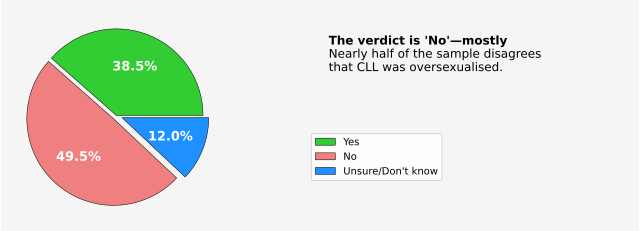

In [162]:
# Oversexualisation opinions across whole sample. Reindexed for custom-sorting.
osx_breakdown = (100 * survey["CLL_OVERSEX"].value_counts(normalize = True)).round(1).reindex(["Yes", "No", "Unsure/Don't know"])

fig_osx, (ax_osx, ax_osx_txt) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")
pie_chart(ax_osx, osx_breakdown, yesno_color, explode = [0, 0.05, 0.07])
legend_setup(ax_osx, loc = (1.4,0.2), optout = "Unsure/Don't know")
aside(ax_osx_txt, "The verdict is 'No'—mostly", "Nearly half of the sample disagrees\nthat CLL was oversexualised.")

_`Figure 23. Percentages of respondents agreeing, disagreeing, or unsure that CLL was oversexualised.`_

In absolute terms, 80 respondents said `Yes`, 103 said `No`, and 25 said `Unsure/Don't know`. The numbers are sufficiently large to build reasonably reliable confidence intervals, so let's do that.

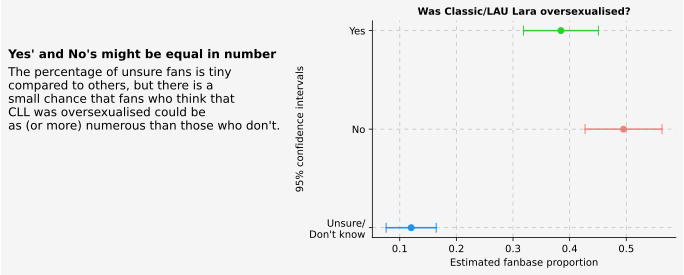

In [163]:
# Calculate the proportions and standard errors of different OSX opinions
osx_proportions = survey["CLL_OVERSEX"].value_counts(normalize = True)
osx_se = prop_std_err(osx_proportions, survey)

# Calculate confidence intervals and custom-sort them so that Yes, No, and Unsure are shown in this order top-to-bottom.
osx_conf_intvls = build_confidence_intervals(osx_proportions, osx_se)
osx_conf_intvls = osx_conf_intvls.reindex(["Unsure/Don't know", "No", "Yes"])

fig_osx_conf_intvls, (ax_osx_conf_intvls_txt, ax_osx_conf_intvls) = plt.subplots(1, 2, figsize= (12, 4), facecolor = "whitesmoke")
cartesian(ax_osx_conf_intvls, xlabel = "Estimated fanbase proportion", ylabel = "95% confidence intervals", spines = "lb", title = "Was Classic/LAU Lara oversexualised?")
confidence_intervals(ax_osx_conf_intvls, osx_conf_intvls, yesno_color)

ax_osx_conf_intvls.set_yticklabels(["Unsure/\nDon't know", "No", "Yes"]) # Break the long label to make the chart prettier.
aside(ax_osx_conf_intvls_txt, "Yes' and No's might be equal in number", "The percentage of unsure fans is tiny\n"
                                                   "compared to others, but there is a\n"
                                                   "small chance that fans who think that\n"
                                                   "CLL was oversexualised could be\n"
                                                   "as (or more) numerous than those who don't.")

_`Figure 24. 95% confidence intervals for the percentages shown in Figure 23.`_

At a 95% confidence level, the percentage of the fandom in the `OSX-unsure` camp is estimated to be between about 7.6% and 16.4%, and in any case much smaller than the percentages of other answers. While there's a higher likelihood that most of the fandom—possibly, even an absolute majority—doesn't think CLL was oversexualised, the `OSX-yes` and `OSX-no` confidence intervals display modest overlap, making it impossible to rule out the possibility that these two opposing opinions might be held by equal proportions of the fandom—or that `OSX-yes` fans might be a majority.

#### The sample's opinion doesn't vary much between the sexes, but it does across orientations

While I had no expectations in a way or another about the pie chart above, I was fully expecting that the sex of the respondents would heavily influence their opinion on the oversexualisation of Classic/LAU Lara. As it turns out, it really didn't. **Both males and females were more likely to answer `No`, but they were more or less equally likely to give any of the three answers.**

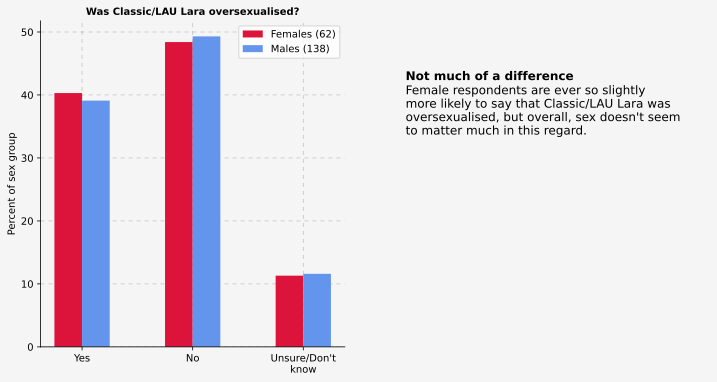

In [164]:
# Distribution of oversexualisation opinions and orientation by sex.
f_orient_osx = survey.loc[survey["SEX"] == "Female", ["ORIENTATION", "CLL_OVERSEX"]]
m_orient_osx = survey.loc[survey["SEX"] == "Male", ["ORIENTATION", "CLL_OVERSEX"]]

# Extract the distribution of oversexualisation opinions by sex.
f_osx = f_orient_osx["CLL_OVERSEX"]
m_osx = m_orient_osx["CLL_OVERSEX"]

# Count of male and female respondents in the view above.
f_osx_count = len(f_osx)
m_osx_count = len(m_osx)
         
# Calculate percentages of oversexualisation opinions by sex, with custom ordering.
f_osx_pct = (100 * f_osx.value_counts(normalize = True)).round(1).reindex(["Yes", "No", "Unsure/Don't know"])
m_osx_pct = (100 * m_osx.value_counts(normalize = True)).round(1).reindex(["Yes", "No", "Unsure/Don't know"])

# Chart
fig_osx_bysex, (ax_osx_bysex, ax_osx_bysex_txt) = plt.subplots(1,2, figsize = (12,6), facecolor ="whitesmoke")
cartesian(ax_osx_bysex, ylabel = "Percent of sex group", title = "Was Classic/LAU Lara oversexualised?")
bar_chart(ax_osx_bysex, f_osx_pct, sex_color["female"], align = "edge", width = -0.25, label = "Females ({})".format(f_osx_count))
bar_chart(ax_osx_bysex, m_osx_pct, sex_color["male"], align = "edge", width = 0.25, label = "Males ({})".format(m_osx_count))
legend_setup(ax_osx_bysex)
aside(ax_osx_bysex_txt, "Not much of a difference", ("Female respondents are ever so slightly\n"
                                                     "more likely to say that Classic/LAU Lara was\n"
                                                     "oversexualised, but overall, sex doesn't seem\n"
                                                     "to matter much in this regard."));

_`Figure 25. Percentages of respondents agreeing, disagreeing, or unsure about CLL's oversexualisation, by sex.`_

Leaving out the `OSX-unsure` people (who are too few among female respondents to make reliable inferences), let's build 95% confidence intervals for the proportions of `OSX-yes` and `OSX-no` female and male respondents who _do_ have a definite opinion.

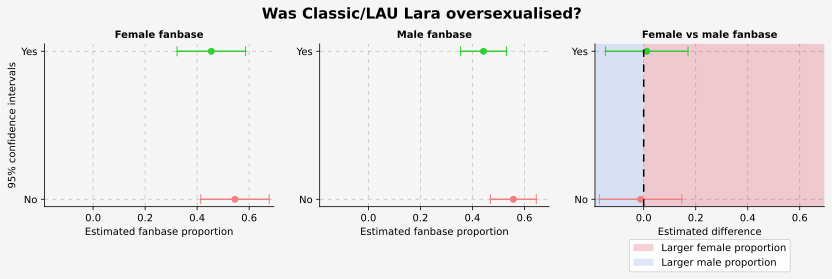

In [165]:
# Calculate the proportion and standard error for each answer for both sexes, excluding `OSX-unsure` respondents.
f_osx_no_unsure = f_osx[f_osx != "Unsure/Don't know"]
m_osx_no_unsure = m_osx[m_osx != "Unsure/Don't know"]

f_osx_prop = f_osx_no_unsure.value_counts(normalize = True)
m_osx_prop = m_osx_no_unsure.value_counts(normalize = True)

f_osx_se = prop_std_err(f_osx_prop, f_osx_no_unsure)
m_osx_se = prop_std_err(m_osx_prop, m_osx_no_unsure)

# Let's compute also the estimated difference between the proportions by sex, and the relative standard errors.
osx_prop_diff_bysex = f_osx_prop - m_osx_prop
se_prop_diff_bysex = prop_std_err([f_osx_prop, m_osx_prop], [f_osx_no_unsure, m_osx_no_unsure])

# Compute 95% confidence intervals.
f_osx_conf_intvls = build_confidence_intervals(f_osx_prop, f_osx_se)
m_osx_conf_intvls = build_confidence_intervals(m_osx_prop, m_osx_se)
prop_diff_bysex_conf_intvls = build_confidence_intervals(osx_prop_diff_bysex, se_prop_diff_bysex)

# Plot the confidence intervals.
fig_osx_bysex_conf_intvls, (ax_osx_bysex_conf_intvls_f, ax_osx_bysex_conf_intvls_m, ax_osx_bysex_conf_intvls_diff) = plt.subplots(1, 3, figsize = (14, 3), facecolor = "whitesmoke")

# Females
cartesian(ax_osx_bysex_conf_intvls_f, xlabel = "Estimated fanbase proportion", ylabel = "95% confidence intervals", spines = "lb", title = "Female fanbase")
confidence_intervals(ax_osx_bysex_conf_intvls_f, f_osx_conf_intvls, yesno_color)

# Males
cartesian(ax_osx_bysex_conf_intvls_m, xlabel = "Estimated fanbase proportion", ylabel = "", spines = "lb", title = "Male fanbase")
confidence_intervals(ax_osx_bysex_conf_intvls_m, m_osx_conf_intvls, yesno_color)

# Females - males
cartesian(ax_osx_bysex_conf_intvls_diff, xlabel = "Estimated difference", ylabel = "", spines = "lb", title = "Female vs male fanbase")
confidence_intervals(ax_osx_bysex_conf_intvls_diff,prop_diff_bysex_conf_intvls, yesno_color)

# Make the x-axis uniform across the charts: pick the smallest and largest limit across the three tuples of limits.
limits = ax_osx_bysex_conf_intvls_m.get_xlim() + ax_osx_bysex_conf_intvls_f.get_xlim() + ax_osx_bysex_conf_intvls_diff.get_xlim()
uniformed_limits = (min(limits), max(limits))

ax_osx_bysex_conf_intvls_f.set_xlim(uniformed_limits)
ax_osx_bysex_conf_intvls_m.set_xlim(uniformed_limits)
ax_osx_bysex_conf_intvls_diff.set_xlim(uniformed_limits)

# Draw 'female' and 'male' patches on the difference chart.
ax_osx_bysex_conf_intvls_diff.axvline(0, color = "k", dashes = (5, 5)) # Separator line.

# Patches origins and dimensions.
xlims = ax_osx_bysex_conf_intvls_diff.get_xlim()
ylims = ax_osx_bysex_conf_intvls_diff.get_ylim()
patch_height = ylims[1] + 0.1 # + 0.1 extends the patch to the very top edge of the axes.
male_origin = (xlims[0], ylims[0])
male_width = -xlims[0] 
female_origin = (0, ylims[0])
female_width = xlims[1]

female_half = mpl.patches.Rectangle(female_origin, female_width , patch_height, facecolor = sex_color["female"], alpha = 0.2, label = "Larger female proportion")
male_half = mpl.patches.Rectangle(male_origin, male_width, patch_height, facecolor = sex_color["male"], alpha = 0.2, label = "Larger male proportion")
ax_osx_bysex_conf_intvls_diff.add_patch(female_half)
ax_osx_bysex_conf_intvls_diff.add_patch(male_half)

# Add legend to illustrate the meaning of the patches.
ax_osx_bysex_conf_intvls_diff.legend(loc = (0.15, -0.4))

fig_osx_bysex_conf_intvls.suptitle("Was Classic/LAU Lara oversexualised?", fontproperties = suptitle_fontprops, y = 1.05);

_`Figure 26. 95% confidence intervals for the proportions (and difference between them) of respondents agreeing or disagreeing that CLL was oversexualised, by sex.`_

As we had a much smaller number of female respondents compared to males, their margin of error is much larger. Our best estimates suggest that over 50% of the female fanbase with an opinion on CLL's oversexualisation will disagree that she was oversexualised, and around 45% will agree; however, due to the large margin of error these percentages are highly variable. The considerable ovelap between the `OSX-yes` and `OSX-no` confidence intervals for females makes it impossible to exclude with any certainty that, at a fandom level, the two camps might be equal in size, or that `OSX-yes` might be larger than `OSX-no`.

While similar issues characterise the male fanbase as well, the margin of error for males is smaller, which makes it more likely that, indeed, most males in the fandom are `OSX-no` proponents. 

According to our best estimates, females in the fandom are about 1.2% more likely than males to be `OSX-yes`, while males are about 1.2% more likely than females to be `OSX-no`. The confidence intervals are similar in width and overlap mostly completely, so unfortunately, the survey data doesn't allow to say with certainty whether a larger proportion of males or females thinks that CLL was oversexualised—or if this opinion is held in equal proportion by both sexes.

When considering sexual orientation in addition to sex, we see that **straight males in the sample are almost twice as likely to say `Yes` compared to straight females, whereas non-straight females are about 20% more likely to say `Yes` than non-straight males.** This is the opposite I was expecting to find: I thought straight males would be less likely than straight females to say `Yes`.

(**Note:** the chart below does *not* say what percentage of straight or non-straight `OSX-yes` respondents are male or female; rather, it says what is the percentage of respondents of a given sex and orientation who replied `Yes`. So, for example, we see that among straight females, 24.1% said `Yes`, which is different from the percentage of `OSX-yes` respondents who are straight females—nearly 19%.)

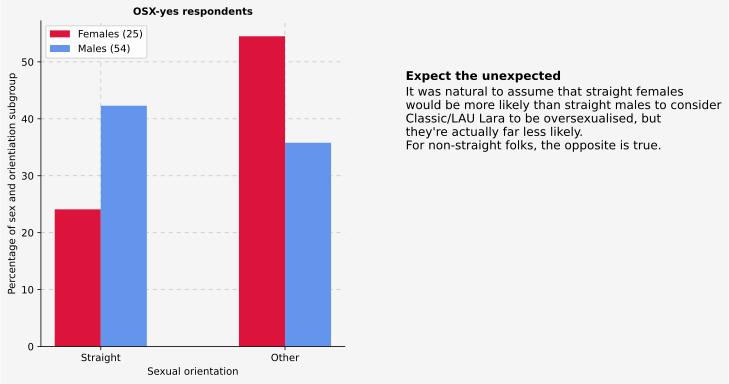

In [166]:
# Create a view for females and one for males where the orientation is either "Straight" or "Other".
f_straight_other = f_orient_osx.copy() 
f_straight_other.loc[f_straight_other["ORIENTATION"] != "Straight", "ORIENTATION"] = "Other"
f_straight_other_pct = ((100 * pd.crosstab(f_straight_other["ORIENTATION"], f_straight_other["CLL_OVERSEX"], normalize = "index"))
                         .round(1)).sort_index(ascending = False)

m_straight_other = m_orient_osx.copy()
m_straight_other.loc[m_straight_other["ORIENTATION"] != "Straight", "ORIENTATION"] = "Other"
m_straight_other_pct = ((100 * pd.crosstab(m_straight_other["ORIENTATION"], m_straight_other["CLL_OVERSEX"], normalize = "index"))
                         .round(1)).sort_index(ascending = False)

# Count of females and males who said "Yes".
f_yes_count = len(f_straight_other.query("CLL_OVERSEX == 'Yes'"))
m_yes_count = len(m_straight_other.query("CLL_OVERSEX == 'Yes'"))

# Chart: respondents who said "Yes", by sex and orientation (straight or other).
fig_osx_yes_bysex, (ax_osx_yes_bysex, ax_osx_yes_bysex_txt) = plt.subplots(1,2, figsize = (12,6), facecolor = "whitesmoke")
cartesian(ax_osx_yes_bysex, xlabel = "Sexual orientation", ylabel = "Percentage of sex and orientiation subgroup", title = "OSX-yes respondents")
bar_chart(ax_osx_yes_bysex, f_straight_other_pct["Yes"], sex_color["female"], align = "edge", width = -0.25, label = "Females ({})".format(f_yes_count))
bar_chart(ax_osx_yes_bysex, m_straight_other_pct["Yes"], sex_color["male"], align = "edge", width = 0.25, label = "Males ({})".format(m_yes_count))
legend_setup(ax_osx_yes_bysex)
aside(ax_osx_yes_bysex_txt, "Expect the unexpected", ("It was natural to assume that straight females\n"
                                                      "would be more likely than straight males to consider\n"
                                                      "Classic/LAU Lara to be oversexualised, but\n"
                                                      "they're actually far less likely.\n"
                                                      "For non-straight folks, the opposite is true."))

_`Figure 27. Percentage of OSX-yes respondents, by orientation and sex. The chart compares percentages from different categories (e.g., % of OSX-yes straight females vs % of OSX-yes straight males). They shouldn't be summed together nor do they necessarily add up to 100%.`_

This is true also of different non-straight subgroups: in the sample, each and every non-straight male subgroup is at most as likely as the corresponding female subgroup to say `Yes`, sometimes much less likely.

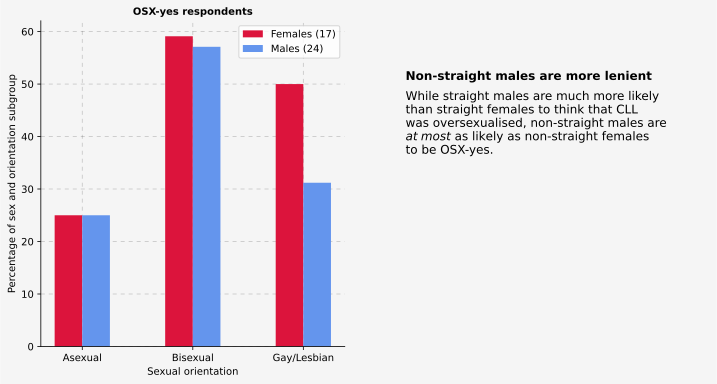

In [167]:
# For both sexes, make a cross-tabular view of the respondents' opinion on Lara's oversexualisation by orientation, in percent. 
# Only non-straight respondents and excluding the orientation "Other/Doesn't say", so [0:3].
f_osx_by_orient = pd.crosstab(f_orient_osx["ORIENTATION"], f_orient_osx["CLL_OVERSEX"])[0:3] 
m_osx_by_orient = pd.crosstab(m_orient_osx["ORIENTATION"], m_orient_osx["CLL_OVERSEX"])[0:3]
f_osx_by_orient_pct = (100 * f_osx_by_orient.div(f_osx_by_orient.sum(axis = 1), axis = 0)).round(1).sort_index()
m_osx_by_orient_pct = (100 * m_osx_by_orient.div(m_osx_by_orient.sum(axis = 1), axis = 0)).round(1).sort_index()

# Count of non-straight people who said "Yes", by sex.
f_osx_y_other_count = f_osx_by_orient["Yes"].sum()
m_osx_y_other_count = m_osx_by_orient["Yes"].sum()

# Chart: non-straight respondents who said "Yes", by sex and orientation.
fig_osx_yes_other_bysex, (ax_osx_yes_other_bysex, 
                          ax_osx_yes_other_bysex_txt) = plt.subplots(1,2, figsize = (12,6), facecolor = "whitesmoke")
cartesian(ax_osx_yes_other_bysex, xlabel = "Sexual orientation", ylabel = "Percentage of sex and orientation subgroup", title = "OSX-yes respondents")
bar_chart(ax_osx_yes_other_bysex, f_osx_by_orient_pct["Yes"], sex_color["female"], align = "edge", width = -0.25, label = "Females ({})".format(f_osx_y_other_count))
bar_chart(ax_osx_yes_other_bysex, m_osx_by_orient_pct["Yes"], sex_color["male"], align = "edge", width = 0.25, label = "Males ({})".format(m_osx_y_other_count))
legend_setup(ax_osx_yes_other_bysex)
aside(ax_osx_yes_other_bysex_txt, "Non-straight males are more lenient", ("While straight males are much more likely\n"
                                                                          "than straight females to think that CLL\n"
                                                                          "was oversexualised, non-straight males are\n"
                                                                          "$\it{at\; most}$ as likely as non-straight females\n"
                                                                          "to be OSX-yes."))

_`Figure 28. The 'Other' group of Figure 26, further broken down by sexual orientation.`_

Finally, in terms of age we see that the percentage of `No`'s is higher than all the others in all cohorts except one (`35-44`). Barring that exception, the pecentage of `No`'s increases with age and vice-versa for the `Yes` option, while the percentage of unsure respondents is much smaller and oscillates much less across all cohorts. Overall, older respondents in the sample are less likely to think that CLL was oversexualised, while younger ones are more likely to think so. This makes sense not only because of the fondness that older players may have for Classic Lara, but also because the perception of what constitutes oversexualisation may have changed over the years; anecdotally, younger people seem to be more sensitive in this regard. Given a larger sample, I would expect to see evidence that these trends hold at a fandom level.

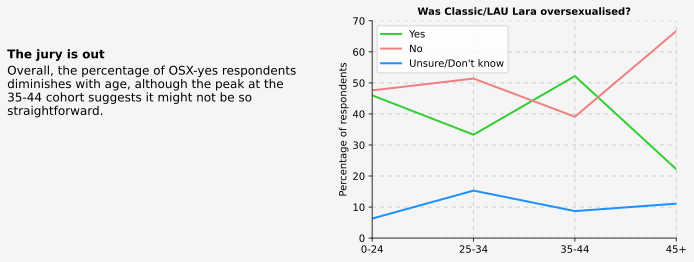

In [168]:
# OSX opinions by age group.
osx_byage = (100 * pd.crosstab(survey["AGE_GROUP"], survey["CLL_OVERSEX"], normalize = 'index')).round(1)
# Exclude the "Doesn't say" group.
osx_byage = osx_byage[0:4]

# Plot OSX-yes and OSX-unsure opinions by age group.
fig_osx_byage, (ax_osx_byage_txt, ax_osx_byage) = plt.subplots(1, 2, figsize = (12, 4), facecolor = "whitesmoke")

aside(ax_osx_byage_txt, "The jury is out", ("Overall, the percentage of OSX-yes respondents\n"
                                            "diminishes with age, although the peak at the\n"
                                            "35-44 cohort suggests it might not be so\n"
                                            "straightforward."))

cartesian(ax_osx_byage, spines = "lb", ylim = (0, 70), ylabel = "Percentage of respondents", title = "Was Classic/LAU Lara oversexualised?", xlim = (0, 3))
for opinion in ["Yes", "No", "Unsure/Don't know"]:
    line_chart(ax_osx_byage, osx_byage[opinion], yesno_color[opinion.lower()], label = opinion)
legend_setup(ax_osx_byage)

_`Figure 29. Percentage of different OSX opinions by age cohort.`_

#### Sources of bias

There are two possible sources of bias that correlate with the respondents' opinion on the subject of Classic/LAU Lara's oversexualisation and may well have influenced it: how much respondents enjoyed different _Tomb Raider_ series ("Series bias") and their personal preferences for different versions of Lara ("Lara bias"). Let's dive into each of them individually.

##### Series bias

If we divide the entire sample into groups of enjoyment level for each _Tomb Raider_ series and plot the percentage of each group that answered `Yes` to the question of Classic/LAU Lara's oversexualisation, a correlation becomes apparent. The higher the enjoyment of Classic or LAU games, the lower the percentage of `OSX-yes` respondents; conversely, the same percentage grows with higher levels of enjoyment of _Survivor_ games. (The option `Didn't play` is excluded because it makes no sense to speak of enjoyment in that case.)

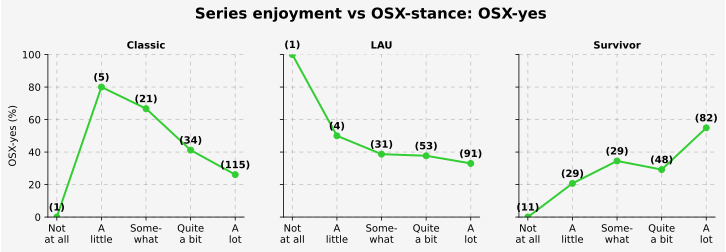

In [169]:
# Order the x axis by enjoyment from low to high. 
enjoyment_scale = ["Not at all", "A little", "Somewhat", "Quite a bit", "A lot"]

# Classic bias
cls_enjoyment_osx = (100 * pd.crosstab(survey.loc[survey["LIKE_CLASSIC"] != "Didn't play", "LIKE_CLASSIC"], survey["CLL_OVERSEX"], normalize = "index")).round(1)
cls_enjoyment_osx = cls_enjoyment_osx.reindex(enjoyment_scale)
cls_enjoyment_count = survey["LIKE_CLASSIC"].value_counts().reindex(enjoyment_scale).reset_index(drop = True).map(lambda x: "({})".format(x))

#LAU bias
lau_enjoyment_osx = (100 * pd.crosstab(survey.loc[survey["LIKE_LAU"] != "Didn't play", "LIKE_LAU"], survey["CLL_OVERSEX"], normalize = "index")).round(1)
lau_enjoyment_osx = lau_enjoyment_osx.reindex(enjoyment_scale)
lau_enjoyment_count = survey["LIKE_LAU"].value_counts().reindex(enjoyment_scale).reset_index(drop = True).map(lambda x: "({})".format(x))

#Survivor bias
srv_enjoyment_osx = (100 * pd.crosstab(survey.loc[survey["LIKE_SURVIVOR"] != "Didn't play", "LIKE_SURVIVOR"], survey["CLL_OVERSEX"], normalize = "index")).round(1)
srv_enjoyment_osx = srv_enjoyment_osx.reindex(enjoyment_scale)
srv_enjoyment_count = survey["LIKE_SURVIVOR"].value_counts().reindex(enjoyment_scale).reset_index(drop=True).map(lambda x: "({})".format(x))

# Plot the trends for OSX-yes respondents.
fig_series_bias_yes, (ax_cls_bias_yes, ax_lau_bias_yes, ax_srv_bias_yes)= plt.subplots(1, 3, figsize=(12, 3), facecolor = "whitesmoke")
fig_series_bias_yes.suptitle("Series enjoyment vs OSX-stance: OSX-yes", fontproperties = suptitle_fontprops, y = 1.1)

# Classic bias: OSX-yes
cartesian(ax_cls_bias_yes, ylabel = "OSX-yes (%)" , title = "Classic", ylim = (0, 100))
line_chart(ax_cls_bias_yes, cls_enjoyment_osx["Yes"], color = yesno_color["yes"], marker = "o", datalabels = cls_enjoyment_count)

# LAU bias: OSX-yes
cartesian(ax_lau_bias_yes, title = "LAU", ylim = (0, 100))
line_chart(ax_lau_bias_yes, lau_enjoyment_osx["Yes"], color =  yesno_color["yes"], marker = "o", datalabels = lau_enjoyment_count)
ax_lau_bias_yes.set_yticks(ax_lau_bias_yes.get_yticks(), [])

# Survivor bias: OSX-yes
cartesian(ax_srv_bias_yes, title = "Survivor", ylim = (0, 100))
line_chart(ax_srv_bias_yes, srv_enjoyment_osx["Yes"], color =  yesno_color["yes"], marker = "o", datalabels = srv_enjoyment_count)
ax_srv_bias_yes.set_yticks(ax_srv_bias_yes.get_yticks(), []);

_`Figure 30. Percentage of OSX-yes respondents, by series enjoyment.`_

The numbers in parentheses indicate the total number of people who said they enjoyed the specific series `Not at all`, `A little`, etc; the green lines indicate the percentage of `OSX-yes` respondents among them. So, for example, across the whole sample, only 5 people said they enjoyed the Classic series only `A little`, and about 80% of them said that CLL was oversexualised.

It's very obvious that the percentage of `OSX-yes` respondents declines significantly as the enjoyment of the Classic series goes up; conversely, the same percentages creeps up when the enjoyment of the _Survivor_  series goes up. The LAU series is somewhere in between, both literally and figuratively, as while the percentage of `OSX-yes` respondents goes clearly down with enjoyment, it does so much more slowly than it does in the case of the Classic series. At a sample level, this seems to suggest that hardcore Classic and _Survivor_ fans might feel more strongly about this issue than LAU fans.

If we exclude the `OSX-unsure` people and recalculate the percentages above, we can see whether different levels of enjoyment for different series correlate with a skew towards `OSX-yes` or `OSX-no`. In the charts below, the blue lines illustrate the difference between the recalculated percentages of `OSX-yes` and `OSX-no` respondents for each enjoyment group of every series. A positive difference means a group is more skewed towards `OSX-yes` (green area), while a negative difference means it's more skewed towards `OSX-no` (red area). The closer that the blue line is to zero, the more similar to each other are the two percentages.

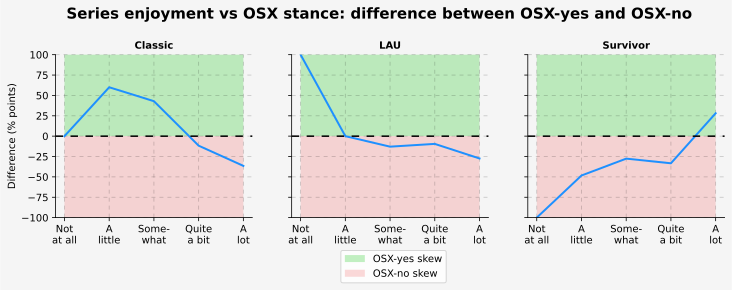

In [170]:
fig_series_bias_diff, (ax_cls_bias_diff, ax_lau_bias_diff, ax_srv_bias_diff)= plt.subplots(1, 3, figsize=(12, 3), facecolor = "whitesmoke")
fig_series_bias_diff.suptitle("Series enjoyment vs OSX stance: difference between OSX-yes and OSX-no", fontproperties = suptitle_fontprops, y = 1.1)

# Recalculate percentages to exclude OSX-unsure folks.
osx_no_unsure = survey.query('CLL_OVERSEX != "Unsure/Don\'t know"')

# Recaulculate Classic.
cls_enjoyment_osx_no_unsure = osx_no_unsure.query('LIKE_CLASSIC != "Didn\'t play"')
cls_enjoyment_osx_no_unsure = (100 * pd.crosstab(cls_enjoyment_osx_no_unsure["LIKE_CLASSIC"], cls_enjoyment_osx_no_unsure["CLL_OVERSEX"], normalize = "index")).round(1)
cls_enjoyment_osx_no_unsure = cls_enjoyment_osx.reindex(enjoyment_scale)

# Recaulculate LAU.
lau_enjoyment_osx_no_unsure = osx_no_unsure.query('LIKE_LAU != "Didn\'t play"')
lau_enjoyment_osx_no_unsure = (100 * pd.crosstab(lau_enjoyment_osx_no_unsure["LIKE_LAU"], lau_enjoyment_osx_no_unsure["CLL_OVERSEX"], normalize = "index")).round(1)
lau_enjoyment_osx_no_unsure = lau_enjoyment_osx.reindex(enjoyment_scale)

# Recaulculate Survivor.
srv_enjoyment_osx_no_unsure = osx_no_unsure.query('LIKE_SURVIVOR != "Didn\'t play"')
srv_enjoyment_osx_no_unsure = (100 * pd.crosstab(srv_enjoyment_osx_no_unsure["LIKE_SURVIVOR"], srv_enjoyment_osx_no_unsure["CLL_OVERSEX"], normalize = "index")).round(1)
srv_enjoyment_osx_no_unsure = srv_enjoyment_osx.reindex(enjoyment_scale)

# Classic: OSX-yes - OSX-no
cartesian(ax_cls_bias_diff, ylabel = "Difference (% points)" , title = "Classic", ylim = (-100, 100))
line_chart(ax_cls_bias_diff, cls_enjoyment_osx_no_unsure["Yes"] - cls_enjoyment_osx_no_unsure["No"], color = posneg_color["neutral"])
ax_cls_bias_diff.axhline(0, color = "k", dashes = (5, 5))

# LAU: OSX-yes - OSX-no
cartesian(ax_lau_bias_diff, title = "LAU", ylim = (-100, 100))
line_chart(ax_lau_bias_diff, lau_enjoyment_osx_no_unsure["Yes"] - lau_enjoyment_osx_no_unsure["No"], color = posneg_color["neutral"])
ax_lau_bias_diff.axhline(0, color = "k", dashes = (5, 5))
ax_lau_bias_diff.set_yticks(ax_lau_bias_diff.get_yticks(), [])

# Survivor: OSX-yes - OSX-no
cartesian(ax_srv_bias_diff, title = "Survivor", ylim = (-100, 100))
line_chart(ax_srv_bias_diff, srv_enjoyment_osx_no_unsure["Yes"]- srv_enjoyment_osx_no_unsure["No"], color = posneg_color["neutral"])
ax_srv_bias_diff.axhline(0, color = "k", dashes = (5, 5));
ax_srv_bias_diff.set_yticks(ax_srv_bias_diff.get_yticks(), [])

# Draw 'yes' and 'no' patches.
for ax in [ax_cls_bias_diff, ax_lau_bias_diff, ax_srv_bias_diff]:
    yes_half = mpl.patches.Rectangle((0,0), 4, 100, facecolor = posneg_color["positive"], alpha = 0.3, label = "OSX-yes skew")
    no_half = mpl.patches.Rectangle((0,0), 4, -100, facecolor = posneg_color["negative"], alpha = 0.3, label = "OSX-no skew")
    ax.add_patch(yes_half)
    ax.add_patch(no_half)
    
# Add legend to illustrate meaning of patches.
ax_lau_bias_diff.legend(loc = (0.25, -0.4));

_`Figure 31. Difference between the percentage of OSX-yes and OSX-no respondents, by series and enjoyment levels. OSX-unsure respondents have been excluded entirely from the calculation.`_

So, for example, if we consider only respondents with a definite yes-or-no opinion, among those who enjoyed Classic games only `A little`, the `OSX-yes` respondents were 60% more than the `OSX-no`. Among respondents who enjoyed LAU games only `A little`, the two percentaces are pretty much equal, while among players who enjoyed Survivor games `Somewhat`, the `OSX-yes` respondents were about 25% less than the `OSX-no`.

From the charts, we can see that, in most cases, respondents who disliked Classic games are firmly in `OSX-yes` territory, crossing the boundary only as enjoyment becomes unequivocally positive. Instead, even as enjoyment of _Survivor_ games goes up, a higher percentage of respondents replied `No` to the question of whether Classic/LAU Lara was oversexualised, inching towards the boundary with each subsequent level and finally crossing it only as the enjoyment is very high. Summing up, **it appears that, in the sample, disliking Classic games correlates with being in the `OSX-yes` camp more than liking _Survivor_ games does.** Liking or disliking LAU games appears to matter much less, and barring an outlier with sample size 1 again, respondents are in the `OSX-no` camp irrespective of enjoyment level, though often barely so.

##### Lara bias

Whether and to what extent a respondent likes a specific version of Lara may well correlate and influence their opinion on the oversexualisation of CLL. 

In the following, I combined which versions of Lara the respondents find attractive with which version is their favourite to obtain the following "appreciation scale", arranged from the lowest to the highest degree:

- `Attractive`: the respondent finds the given version of Lara physically attractive.
- `Exclusively attractive`: the respondent finds physically attractive _only_ the given version of Lara, and not any other.
- `Favourite`: the given version of Lara is the respondent's favourite in every respect.

The reasoning behind this arrangement is that a respondent who finds, say, LAU Lara exclusively attractive likes her more than the other two versions, because he or she isn't attracted to them at all. Respondents were asked to determine their favourite Lara considering everything about her—including appearance—and while they could be attracted to more than one version, they could indicate only one as their favourite, so this seems a natural choice for the highest degree on the appreciation scale.

I did not prepare the survey questions with this scale in mind, and more granular questions about each version of Lara would be necessary to better quantify how much a respondent likes it. However, even this simplistic scale can reveal some interesting trends in the data.

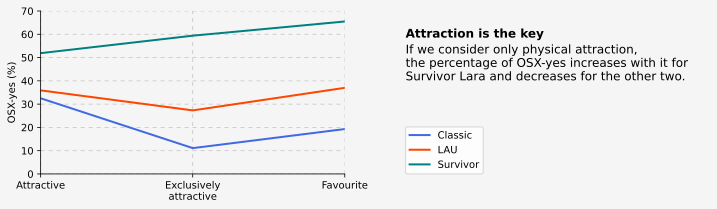

In [171]:
def attractive_lara(lara_version, exclusive = False):
    """Returns a boolean mask of `survey` pointing to the rows where the specified version of Lara is marked as attractive. 
    If `exclusive` is True, the mask points only to the rows where only the specified version is marked as attractive.     
    `lara_version` must be CLASSIC, LAU, or SURVIVOR.
    
    Returns: Pandas series (boolean mask)
    """            
    mask = survey[lara_version + "_ATTR"] == True    
    if exclusive:
        versions = ["CLASSIC", "LAU", "SURVIVOR"]
        versions.remove(lara_version)
        mask = mask & (survey[versions[0] + "_ATTR"] == False) & (survey[versions[1] + "_ATTR"] == False)
    return mask
    
# Breakdown of OSX opinions grouped by preference for Classic Lara.
cls_attr_osx = survey.loc[attractive_lara("CLASSIC"), "CLL_OVERSEX"].value_counts()
cls_excl_attr_osx = survey.loc[attractive_lara("CLASSIC", exclusive = True), "CLL_OVERSEX"].value_counts()
cls_fav_osx = survey.loc[survey["FAVOURITE_LARA"] == "Classic", "CLL_OVERSEX"].value_counts()
cls_pref_osx = pd.DataFrame({"Attractive": cls_attr_osx, "Exclusively attractive": cls_excl_attr_osx, "Favourite": cls_fav_osx})
cls_pref_osx_pct = (100 * cls_pref_osx / cls_pref_osx.sum()).round(1)

# Breakdown of OSX opinions grouped by preference for LAU Lara.
lau_attr_osx = survey.loc[attractive_lara("LAU"), "CLL_OVERSEX"].value_counts()
lau_excl_attr_osx = survey.loc[attractive_lara("LAU", exclusive = True) , "CLL_OVERSEX"].value_counts()
lau_fav_osx = survey.loc[survey["FAVOURITE_LARA"] == "LAU", "CLL_OVERSEX"].value_counts()
lau_pref_osx = pd.DataFrame({"Attractive": lau_attr_osx, "Exclusively attractive": lau_excl_attr_osx, "Favourite": lau_fav_osx})
# Of those who were attracted only to LAU Lara, no one said they were unsure, hence the NA to fill with zero.
lau_pref_osx_pct = (100 * lau_pref_osx / lau_pref_osx.sum()).round(1).fillna(0) 

# Breakdown of OSX opinions grouped by preference for Survivor Lara.
srv_attr_osx = survey.loc[attractive_lara("SURVIVOR"), "CLL_OVERSEX"].value_counts()
srv_excl_attr_osx = survey.loc[attractive_lara("SURVIVOR", exclusive = True) , "CLL_OVERSEX"].value_counts()
srv_fav_osx = survey.loc[survey["FAVOURITE_LARA"] == "Survivor", "CLL_OVERSEX"].value_counts()
srv_pref_osx = pd.DataFrame({"Attractive": srv_attr_osx, "Exclusively attractive": srv_excl_attr_osx, "Favourite": srv_fav_osx})
srv_pref_osx_pct = (100 * srv_pref_osx / srv_pref_osx.sum()).round(1)

# Plot the percentage of OSX-yes on the attractiveness scale.
fig_osx_yes, (ax_yes, ax_yes_txt) = plt.subplots(1, 2, figsize = (12, 3), facecolor = "whitesmoke")
cartesian(ax_yes, ylabel = "OSX-yes (%)", xlim = (0, 2), ylim = (0, 70))
line_chart(ax_yes, cls_pref_osx_pct.loc["Yes", :], tr_color["classic"], label = "Classic")
line_chart(ax_yes, lau_pref_osx_pct.loc["Yes", :], tr_color["lau"], label = "LAU")
line_chart(ax_yes, srv_pref_osx_pct.loc["Yes", :], tr_color["survivor"], label = "Survivor")
legend_setup(ax_yes, loc = (1.2, 0))
aside(ax_yes_txt, "Attraction is the key", ("If we consider only physical attraction,\n"
                                            "the percentage of OSX-yes increases with it for\n"
                                            "Survivor Lara and decreases for the other two."))

_`Figure 32. Percentage of OSX-yes among respondents, by appreciation level for each Lara.`_

It's obvious that, as preference for Survivor Lara grows, the percentage of respondents saying that Classic/LAU Lara was oversexualised grows too. Conversely, the higher the preference for Classic or LAU Lara, the lower the percentage of `OSX-yes`, especially in the case of Classic Lara. However, strangely enough, the percentage of `OSX-yes` goes up around 10% in both cases when Classic or LAU Lara are a respondent's favourite. In absence of other data, it's probable that this is an artefact due to how the appreciation scale was built. A scale with more and more articulate options would probably work better.

Note that, while there is considerable difference overall between the `OSX-yes` lines of Classic and LAU Lara, the difference shrinks down significantly when looking at `OSX-no` lines. Both are fairly high up in the chart below, unlike the Survivor line, all of which generally suggests that **liking Classic/LAU Lara to _any_ extent pushes respondents towards the `OSX-no` camp with similarly high chance, while liking Survivor Lara to _any_ extent correlates with higher chances of `OSX-yes`.**

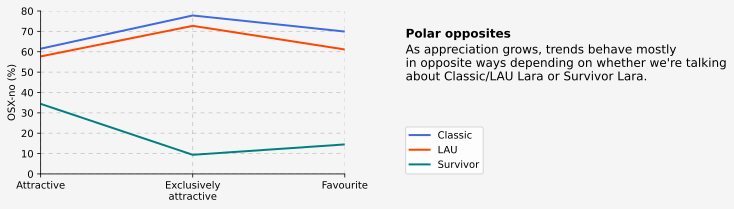

In [172]:
# Plot the percentage of OSX-no on the attractiveness scale.
fig_osx_no, (ax_no, ax_no_txt) = plt.subplots(1, 2, figsize = (12, 3), facecolor = "whitesmoke")
cartesian(ax_no,  ylabel = "OSX-no (%)", xlim = (0, 2), ylim = (0, 80))
line_chart(ax_no, cls_pref_osx_pct.loc["No", :], tr_color["classic"], label = "Classic")
line_chart(ax_no, lau_pref_osx_pct.loc["No", :], tr_color["lau"], label = "LAU")
line_chart(ax_no, srv_pref_osx_pct.loc["No", :], tr_color["survivor"], label = "Survivor")
legend_setup(ax_no, loc = (1.2,0))
aside(ax_no_txt, "Polar opposites", ("As appreciation grows, trends behave mostly\n"
                                     "in opposite ways depending on whether we're talking\n"
                                     "about Classic/LAU Lara or Survivor Lara."))

_`Figure 33. Percentage of OSX-no among respondents, by appreciation level for each Lara.`_

Also note how any kind of appreciation for Classic/LAU Lara correlates with lower degrees of uncertainty; the opposite is true for Survivor Lara, although the trend presents more variation.

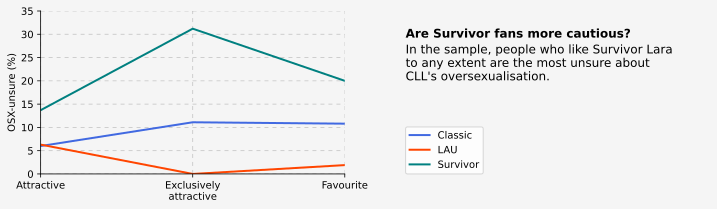

In [173]:
# Plot the percentage of OSX-unsure on the attractiveness scale.
fig_osx_unsure, (ax_unsure, ax_unsure_txt) = plt.subplots(1, 2, figsize = (12, 3), facecolor = "whitesmoke")
cartesian(ax_unsure, ylabel = "OSX-unsure (%)", xlim = (0, 2), ylim = (0, 35))
line_chart(ax_unsure, cls_pref_osx_pct.loc["Unsure/Don't know", :], tr_color["classic"], label = "Classic")
line_chart(ax_unsure, lau_pref_osx_pct.loc["Unsure/Don't know", :], tr_color["lau"], label = "LAU")
line_chart(ax_unsure, srv_pref_osx_pct.loc["Unsure/Don't know", :], tr_color["survivor"], label = "Survivor")
legend_setup(ax_unsure, loc = (1.2, 0))
aside(ax_unsure_txt, "Are Survivor fans more cautious?", ("In the sample, people who like Survivor Lara\n"
                                                          "to any extent are the most unsure about\n"
                                                          "CLL's oversexualisation."))

_`Figure 34. Percentage of OSX-unsure among respondents, by appreciation level for each Lara.`_

In conclusion, **while liking Survivor Lara more correlates with a higher chance of being in the `OSX-yes` camp, and vice-versa for the other two versions of Lara, it looks like Classic/LAU Lara fans are overall more certain of their OSX opinion than Survivor fans.** This might be explained, for example, by a higher prevalence of respondents in the sample who aren't very familiar with Classic/LAU Lara (and therefore reserve judgement) amongst _Survivor_ fans.

### _How_ was Classic/LAU Lara oversexualised?

`OSX-yes` respondents were asked to specify how Classic/LAU Lara was oversexualised by choosing from a list all the options they thought applied. The options corresponded each to a feature of Lara, and can be subdivided into "physical" and "non-physical", as in pertaining directly to Lara's body appearance or not. In the charts below, these options are indicated by the following abbreviations:

|**Type**|**Option** |**Abbreviation**|
|:---    |           |            ---:|
| Physical |_Her face was too sensual._|`FACE`|
| Physical |_Her breasts were unrealistically large._|`BREASTS`|
| Physical |_Her waist was unrealistically thin._|`WAIST`|
| Physical |_Her hips were unrealistically wide._|`HIPS`|
| Non-physical |_Her behaviour was too suggestive._|`BEHAVIOUR`|
| Non-physical |_Her clothes were too revealing._|`CLOTHES`|
| Non-physical |_Promotional artwork for the games was sometimes inappropriate/suggestive._|`ARTWORK`|
| Non-physical |_Her appearances in unrelated commercials were inappropriate/suggestive._|`ADS`|
| Unspecified |_Other_|`OTHER`|

Note that the `OTHER` option didn't allow respondents to further elaborate.

The chart below displays the percentage of `OSX-yes` respondents who ticked each option, in decreasing order; physical features are highlighted in green. Keep in mind that as respondents could choose any number of options they liked, percentages don't have to add up to 100%.

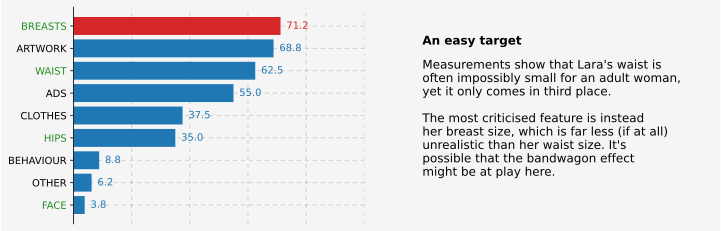

In [174]:
# Lists of columns we're going to reuse a lot.
osx_feature_cols = list(survey.columns[5:14])
demo_cols = ["SEX","ORIENTATION"]

# Physical features to highlight.
def highlight_physical_features(ax, axis):
    """Highlights physical feature labels on the given axis of `ax` by colouring them green.
    `ax` is a matplotlib axes.
    `axis` is a string identifying the axes where the feature labels are located, "x" or "y".
    """
    
    physical_features = ["face", "breasts", "waist", "hips"]
    if axis == "y":
        tick_labels = ax.get_yticklabels()
    else:
        tick_labels = ax.get_xticklabels()
    for label in tick_labels:
        if label.get_text().lower() in physical_features:
            label.set_color(physical_color)

# Create a view of the dataframe focussing on OSX features and demographics.
osx_features = survey.loc[survey["CLL_OVERSEX"] == "Yes", demo_cols + osx_feature_cols].copy()

# Remove "CLL_OSX_" from the name of all OSX-feature columns.
new_osx_feature_cols = map(lambda name: name.replace("CLL_OSX_", ""), osx_feature_cols)
new_osx_feature_cols = dict(zip(osx_feature_cols, new_osx_feature_cols))
osx_features.rename(columns = new_osx_feature_cols, inplace = True)
osx_feature_cols = list(new_osx_feature_cols.values())

# Percent of OSX-yes respondents that voted for each osx-feature
osx_features_pct =  (100 * osx_features[osx_feature_cols].sum() / len(osx_features)).round(1).sort_values()

# OSX features in percentage.
fig_osx_feats, (ax_osx_features, ax_osx_features_txt) = plt.subplots(1,2, figsize = (11.5, 4), facecolor = "whitesmoke")

# Highlight the highest percentage.
feature_colors = ["tab:blue" for i in range(9)]
feature_colors[8] = "tab:red"

# Draw the chart.
cartesian(ax_osx_features, spines = "l", xlim = (0, 100))
barh_chart(ax_osx_features, osx_features_pct, colors = feature_colors, datalabels = osx_features_pct)
ax_osx_features.tick_params(axis = "x", which = "both", bottom = False, labelbottom = False)
highlight_physical_features(ax_osx_features, "y")

aside(ax_osx_features_txt, "An easy target", ("Measurements show that Lara's waist is\n"
                                              "often impossibly small for an adult woman,\n"
                                              "yet it only comes in third place.\n\n"
                                              "The most criticised feature is instead\n"
                                              "her breast size, which is far less (if at all)\n"
                                              "unrealistic than her waist size. It's\n"
                                              "possible that the bandwagon effect\n"
                                              "might be at play here."))

_`Figure 35. Oversexualised features of CLL, by percentage of OSX-yes respondents who voted for them.`_

The option with the highest percentage is `BREASTS`, which is hardly surprising: it's difficult to find any critique of Lara Croft that 
won't disapprove of her allegedly "impossibly large" bust, and the views of the respondents might have been influenced by exposure to this commonly held opinion. The `WAIST` option, instead, only comes in third place although a case could be made that it deserved to be first.

As said in the introduction, my original project was larger in scope than just this survey, and included taking Classic and LAU Lara's body measurements from her 3D models in different games, so that I could compare them to the official ones stated by her designers and verify if and to what extent they were unrealistic. As I found out, while not small or necessarily common, her breast size isn't unheard of for women, unlike her waist circumference, which averages 49 centimetres across all Classic and LAU games, with an all-time lowest of merely 41 centimetres and a maximum of 56 centimetres. Very few critics ever seem to pay attention to this, but the percentage of fans who voted for the `WAIST` option is nonetheless decent. 

It's interesting that 35% of the respondents thought Lara's hips were "unrealistically wide"; according to my measurements, her in-game hip circumference is the most consistent measurement across all the games; it matches pretty much exactly her official hip circumference and is very common among real-life female models. (It should be noted that what constitutes an "unrealistic" measurement wasn't explicitly defined and therefore likely varied for each respondent.)

Other high percentages, such as those of `ARTWORK` and `ADS`, are in agreement with the general sentiment on commonly criticised aspects of the franchise, which especially in the early days was well known for its sex-appeal-centric marketing campaign. 

The percentages above can vary somewhat when broken down by sex or orientation of the respondents, revealing some interesting trends.

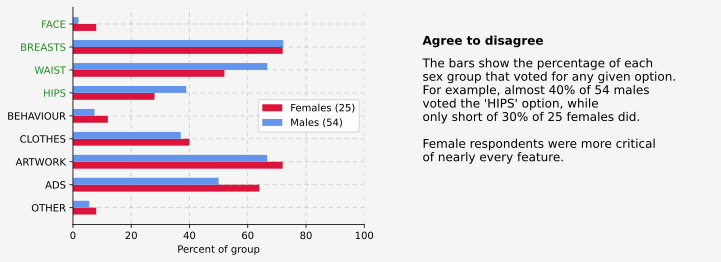

In [175]:
# Percent of respondents that voted for each osx-feature by sex. (Males or females only. Other groups are too small.)
osx_female_count = len(osx_features.query("SEX == 'Female'")) 
osx_male_count = len(osx_features.query("SEX == 'Male'")) 

osx_features_bysex_pct = osx_features.loc[osx_features["SEX"].isin(["Male", "Female"]), :] 
osx_features_bysex_pct = osx_features[["SEX"] + osx_feature_cols].pivot_table(index = "SEX", aggfunc = "sum")
osx_features_bysex_pct.loc["Female"] = (100 * osx_features_bysex_pct.loc["Female"] / osx_female_count).round(1)
osx_features_bysex_pct.loc["Male"] = (100 * (osx_features_bysex_pct.loc["Male"] / osx_male_count)).round(1)

#OSX features by sex.
fig_osx_features_bysex, (ax_osx_features_bysex, ax_osx_features_bysex_txt) = plt.subplots(1 ,2, figsize = (11.5, 4), facecolor = "whitesmoke")

# Custom-order the features so that physical features come first.
features_order = ["OTHER", "ADS", "ARTWORK", "CLOTHES", "BEHAVIOUR","HIPS", "WAIST", "BREASTS", "FACE"]
osx_features_females = osx_features_bysex_pct.loc["Female"].reindex(features_order)
osx_features_males = osx_features_bysex_pct.loc["Male"].reindex(features_order)

cartesian(ax_osx_features_bysex, xlim = (0, 100), xlabel = "Percent of group")
barh_chart(ax_osx_features_bysex, osx_features_females, height = -0.3, colors = sex_color["female"], align = "edge", label = "Females ({})".format(osx_female_count))
barh_chart(ax_osx_features_bysex, osx_features_males, height = 0.3, colors = sex_color["male"], align = "edge", label = "Males ({})".format(osx_male_count))
legend_setup(ax_osx_features_bysex)
highlight_physical_features(ax_osx_features_bysex, "y")

aside(ax_osx_features_bysex_txt, "Agree to disagree", ("The bars show the percentage of each\n"
                                                       "sex group that voted for any given option.\n"
                                                       "For example, almost 40% of 54 males\n"
                                                       "voted the 'HIPS' option, while\n"
                                                       "only short of 30% of 25 females did.\n\n"
                                                       "Female respondents were more critical\n"
                                                       "of nearly every feature."))

_`Figure 36. Oversexualised features of CLL, by percentage of OSX-yes respondents who voted for them. Categorised by sex of the respondent.`_

It's interesting that males and females disagree by and large on every option except `BREASTS`, on which they agree in virtually identical percentages. Also note that, in percentage, female respondents picked nearly every option more frequently than male respondents did, except `BREASTS`, `HIPS` and `WAIST`, which is somewhat surprising. About 50% of them noticed Lara's abnormally tiny waist, which is a fair percentage, but the fact that 20% more males than females did is noteworthy. (The assumption being that women would probably have a better idea than men about what is or isn't a realistic female waist size.) 

Overall, it would seem that **`OSX-yes` females are slightly-to-fairly more critical of Classic/LAU Lara than `OSX-yes` males in all regards _except_ physical features,** which seems counterintuitive.

Perhaps even more interesting patterns emerge when looking at the difference between responses of straight and non-straight survey takers. **Non-straight people generally focussed on non-physical traits more than they did on physical traits, while the opposite is true for straight people**. Additionally, non-straight respondents often focussed on non-physical traits more than straight people did, whereas they focussed on physical traits at most as much as straight people did.

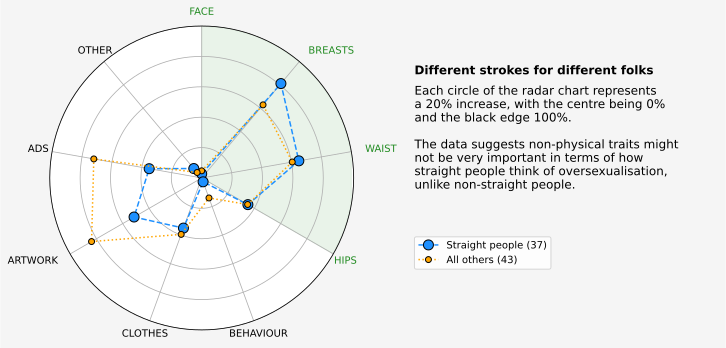

In [176]:
# Straight vs non-straight
osx_straight_count = len(osx_features.query("ORIENTATION == 'Straight'")) 
osx_non_straight_count = len(osx_features.query("ORIENTATION != 'Straight'")) 
osx_straight_pct = (100 * osx_features.loc[osx_features["ORIENTATION"] == "Straight", osx_feature_cols].sum() / osx_straight_count).round(1)
osx_non_straight_pct = (100 * osx_features.loc[osx_features["ORIENTATION"] != "Straight", osx_feature_cols].sum() / osx_non_straight_count).round(1)

# We create this figure differently than before, because making radar charts in Matplotlib is apparently a bit more convoluted.
fig_features_straight_others = plt.figure(figsize = (12, 6), facecolor = "whitesmoke")

#Location of each feature on the polar chart. Expressed in degrees (0-359)
angles = [90, 50, 10, 330, 290, 250, 210, 170, 130] 

ax_features_straight_others = fig_features_straight_others.add_subplot(121, polar = True)
polar(ax_features_straight_others, angles)
ax_features_straight_others.plot(np.radians(angles), osx_straight_pct, label = "Straight people ({})".format(osx_straight_count), marker = "o", color = orient_color["straight"], ls = "--", mec = "k", ms = 10);
ax_features_straight_others.plot(np.radians(angles), osx_non_straight_pct, label = "All others ({})".format(osx_non_straight_count), marker = "o", color = orient_color["non-straight"], ls = ":", mec = "k")
highlight_physical_features(ax_features_straight_others, "x")

legend_setup(ax_features_straight_others, loc = (1.2, 0.2))

ax_features_straight_others_txt = fig_features_straight_others.add_subplot(122)
aside(ax_features_straight_others_txt, "Different strokes for different folks", ("Each circle of the radar chart represents\n"
                                                                                 "a 20% increase, with the centre being 0%\n"
                                                                                 "and the black edge 100%.\n\n"
                                                                                 "The data suggests non-physical traits might\n"
                                                                                 "not be very important in terms of how\n"
                                                                                 "straight people think of oversexualisation,\n"
                                                                                 "unlike non-straight people."))

_`Figure 37. Comparison between the percentage of the votes of straight and non-straight OSX-yes respondents received by each feature.`_

However, the difference between votes of straight and non-straight respondents is often minimal when it comes to physical features, barring the `BREASTS` option which was voted by about 20% more heterosexual people. It's tempting to hypothesise that, **for straight people, what constitutes oversexualisation of a character might be the hyperaccentuation of their sex-specific physical traits; for non-straight people, the way a character is presented and acts might be more important.** However, while the two subsamples have comparable sizes, a larger sample and more specific questions would definitely be needed to test this hypothesis; for example, in a sample of this size, it might well be that fewer straight people than others happened to see a lot of promotional _Tomb Raider_ promotional artwork, entirely out of random chance.

Straight males and straight females appeared to focus on non-physical features to a similar extent, although they disagree on nearly every individual feature, sometimes dramatically so. Notably, straight females also were much less likely than straight males to vote for physical features, except for `BREASTS`, which was voted for by a slightly higher percentage of straight females instead. However, the straight-female subsample is not comparable in size to the straight-male one, and is in itself too small to draw any meaningful conclusions. Nonetheless, like the previous one, the chart below suggests that oversexualisation might be more about physical features than others for straight people.

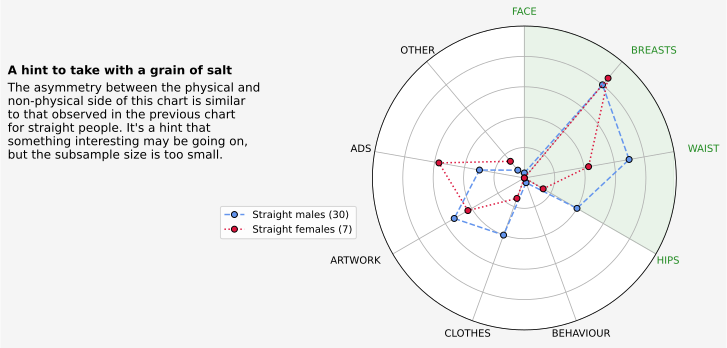

In [177]:
# Straight females vs straight males.
osx_straight_females_count = len(osx_features.query("SEX =='Female' and ORIENTATION == 'Straight'"))
osx_straight_males_count = len(osx_features.query("SEX == 'Male' and ORIENTATION == 'Straight'")) 

osx_straight_males = (100 * osx_features.query("SEX == 'Male' and ORIENTATION == 'Straight'")[osx_feature_cols]
                      .sum() / osx_straight_males_count).round(1)

osx_straight_females = (100 * osx_features.query("SEX == 'Female' and ORIENTATION == 'Straight'")[osx_feature_cols]
                      .sum() / osx_straight_females_count).round(1)

# Chart.
fig_features_straight = plt.figure(figsize = (12, 6), facecolor = "whitesmoke")

ax_features_straight = fig_features_straight.add_subplot(122, polar = True)
polar(ax_features_straight, angles)
plt.plot(np.radians(angles), osx_straight_males, label = "Straight males ({})".format(osx_straight_males_count), marker = "o", color = sex_color["male"], ls = "--", mec = "k")
plt.plot(np.radians(angles), osx_straight_females, label = "Straight females ({})".format(osx_straight_females_count), marker = "o", color = sex_color["female"], ls = ":", mec = "k");
highlight_physical_features(ax_features_straight, "x")

legend_setup(ax_features_straight, loc=(-0.5, 0.3))

ax_features_straight_txt = fig_features_straight.add_subplot(121)
aside(ax_features_straight_txt, "A hint to take with a grain of salt", ("The asymmetry between the physical and\n"
                                                                        "non-physical side of this chart is similar\n"
                                                                        "to that observed in the previous chart\n"
                                                                        "for straight people. It's a hint that\n"
                                                                        "something interesting may be going on,\n"
                                                                        "but the subsample size is too small."))

_`Figure 38. Comparison between the percentage of the votes of straight male and female OSX-yes respondents received by each feature.`_

## Conclusions

In this project, I tried to answer some questions about the perception that the _Tomb Raider_ fandom has of Classic and LAU Lara Croft, as well as to gain insights on the fandom itself. The dataset, obtained through a survey I ran on different social media outlets, contained the answers to 20 different questions of 208 total respondents.

The sample in the dataset is mostly male, with younger people between the ages of 18 and 34 constituting the overwhelming majority. While nearly half of the respondents are heterosexual, other orientations exist in relatively large percentages. Overall, Classic _Tomb Raider_ games are the respondents' favourite, especially compared to _Survivor_ games which are the least liked. While age does seem to play a role in how much Classic, LAU, and _Survivor_ games are liked, _Survivor_ games are liked significantly less across all age cohorts.

I set out to establish whether Lara's exaggerated sex appeal in Classic and LAU games made the games unlikeable to female players, or anyway less likeable than for males. I further wanted to see if female players prefer _Survivor_ games, for this or any other reason. My analysis revealed that **female players in the sample enjoyed Classic games more than LAU games, and LAU games more than _Survivor_ games, whose enjoyment score is over 30% lower than that of Classic games.**

Additionally, sampled female players like Classic games more than males do when measured by overall enjoyment score, although by a small margin. They like both LAU and _Survivor_ games less than males, again not by much. Fewer females than males, in percentage, gave a positive enjoyment score to _Survivor_ games, and more gave a negative one. 

Generalising these findings to the whole fandom wasn't possible, because some some subsamples (such as the respondents who liked the Classic series only `A little`, among others) were too small to build reliable confidence intervals. However, at a sample level, **the data contradict the hypothesis that female players didn't enjoy Classic and LAU games, and that they prefer _Survivor_ games instead.**

Another question I set out to answer was whether Classic and LAU Lara are less liked than Survivor Lara by female players because of their over-the-top sex appeal, and whether straight male players like them more than Survivor Lara for the same reason. The data shows that **Classic Lara is favoured by about 40% of all respondents;** the other two versions virtually tie at around 26%. Although the margin of error for these estimates is large, the analysis showed that, **at a fandom level, we can be 95% sure that Classic Lara is preferred by a larger percentage of the fanbase than the other two versions of Lara.** In the sample, these preferences appear to be influenced somewhat by age, and especially Classic Lara's popularity is higher among older respondents. That notwithstanding, **Survivor Lara is not the absolute favourite of any age cohort.**

When broken down by sex, these preferences reveal that, in percentage, **more females than males in the sample prefer Classic and LAU Lara, whereas males prefer Survivor Lara in a fairly higher percentage than females do.** For both sexes, the favourite remains Classic Lara. The least favourites are LAU Lara for males and Survivor Lara for females. At a fandom level, all we could determine with 95% confidence is that **Survivor Lara is unlikely to be the favourite of female fans, with Classic Lara being most likely their favourite;** instead, any other version might be the males' favourite, including Survivor Lara. While all three versions might be liked in equal proportions by both sexes, the analysis suggests that the percentage of male fans preferring Survivor Lara is up to over 20% larger than that of her female fans. Classic and LAU Lara, instead, are more likely to be preferred by a larger proportion of female fans.

About **straight males specifically, in the sample they unequivocally prefer Survivor Lara (38%)**, Classic Lara trailing nearly 13 percentage points behind and being their least favourite. Once more, age seems to play a role, with Classic Lara generally scoring higher among older cohorts and vice-versa for Survivor Lara. Preference for LAU Lara goes up and down with age, a trend that was observed many times for both her and LAU games overall, not only as a function of age.

When sexual attraction is removed from the equation, preferences among straight males do change, but in an unexpected way. Among straight males who said they were _not_ attracted to Classic Lara, the percentage of those whose favourite was still Classic Lara decreased only by 6.8% compared to the baseline. (That is, the preferences expressed by all straight males in the sample.) This same decline is much more sharp for LAU Lara (24.6%) and Survivor Lara (32.4%), suggesting **preference for LAU or Survivor Lara among straight males may depend on sex appeal more than it does in the case of Classic Lara.**  

95% confidence intervals don't allow to rule out any version of Lara as the one preferred by a larger proportion of male fans, but **in the case of non-straight males, Classic Lara is likely the fandom's favourite.**

Out of the 208 respondents, **only short of 39% think CLL was oversexualised** (`OSX-yes` for short). Nearly 50% disagreed, and 12% were undecided. At a 95% confidence level, it is possible that the percentage of `OSX-yes` and `OSX-no` may be equal, but that chance is low.
Males and females in the sample agree, disagree, and are undecided on this issue in very similar percentages, though the margin of error is high, and at a fandom level these percentages might differ by as much as 30% in a worst-case scenario.  

It should be noted that the enjoyment level of each _Tomb Raider_ series appears to affect the respondents' opinion: **higher levels of enjoyment of Classic and LAU games correlate with lower percentages of `OSX-yes`, and vice-versa for _Survivor_ games.** However, the data seems to indicate that disliking Classic games is a better predictor of a respondent being `OSX-yes` than liking _Survivor_ games is. Similarly, **the more a respondent likes Classic or LAU Lara, the less likely they are to be `OSX-yes`, anv vice-versa for Survivor Lara.**

In terms of which features were oversexualised, **males and females tended to disagree to varying extents about nearly every feature;** females appeared to be slightly more critical overall—except physical features, about which, interestingly, they were fairly less critical than males. Finally, an interesting trend in the data suggests that **straight and non-straight respondents may have different definitions of 
oversexualisation of a character,** with non-straight respondents putting far more emphasis on character presentation than straight respondents do. Accentuation of physical traits appears to matter for both parties, though arguably more for straight respondents.

#### Caveats

When I conceived this survey, I did not plan to do anything but a simple exploratory analysis of the results; the idea to apply statistical methods to them was an afterthought and is intended only as an exercise. Overall, the sample and its many subsamples are too small to draw accurate conclusions on the entire _Tomb Raider_ fandom, as shown by the large margin of errors we've seen. Additionally, the social media outlets through which the survey was shared may over- or underrepresent different demographic groups, which has likely skewed the sample. All conclusions are tentative and would require a larger sample and/or more specific questions to be confirmed or rejected at a fandom level.